## Financial Time Series Project
#### Task 1: Data analysis

First thing to do with the data is perform some *clean up*, in order to do that we wanna take a general look at the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
file_path = "./spiff_data.csv"
data = pd.read_csv(file_path)

data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5456 non-null   int64  
 1   day           5456 non-null   int64  
 2   gurkor        5206 non-null   float64
 3   guitars       5206 non-null   float64
 4   slingshots    5206 non-null   float64
 5   stocks        5206 non-null   float64
 6   sugar         5206 non-null   float64
 7   water         5206 non-null   float64
 8   tranquillity  5206 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 383.8 KB


Unnamed: 0  day    gurkor   guitars  slingshots     stocks     sugar  \
0           0    1  6.154653  2.794285    2.136536  10.653684  3.324896   
1           1    2  6.189623  2.843068    2.113582  10.674465  3.355736   
2           2    3  6.168641  2.839644    2.116336  10.822372  3.336461   
3           3    4  6.156401  2.823384    2.096137  10.848804  3.288274   
4           4    5  6.124929  2.832798    2.099810  10.860731  3.303694   

      water  tranquillity  
0  3.896149      7.755880  
1  3.899915      7.781310  
2  3.897404      7.886205  
3  3.901170      7.848061  
4  3.905355      7.883026

In [3]:
data.describe()

Unnamed: 0          day       gurkor      guitars   slingshots  \
count  5456.000000  5456.000000  5206.000000  5206.000000  5206.000000   
mean   2727.500000  2728.500000     9.886550     6.713898     4.519504   
std    1575.155865  1575.155865    30.785709    30.850516    30.883866   
min       0.000000     1.000000     5.942896     2.629048     2.001362   
25%    1363.750000  1364.750000     6.948963     4.258847     2.808930   
50%    2727.500000  2728.500000     8.907936     5.912364     3.384898   
75%    4091.250000  4092.250000    10.191398     7.058370     4.294821   
max    5455.000000  5456.000000  1000.000000  1000.000000  1000.000000   

            stocks        sugar        water  tranquillity  
count  5206.000000  5206.000000  5206.000000   5206.000000  
mean      7.309093     3.621403     6.749451     12.502258  
std      30.856220    30.904930    30.825744     30.774131  
min       4.012346     1.370262     3.739412      6.614749  
25%       4.917271     1.999489     4.996764      9.194215  
50%       5.521318     2.606234     5.775716     10.591227  
75%       6.977501     3.281805     6.492295     13.382072  
max    1000.000000  1000.000000  1000.000000   1000.000000

From the above we can notice two things, that the max value for each TS is 1000 which seems a bit odd and that there is some missing data.

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

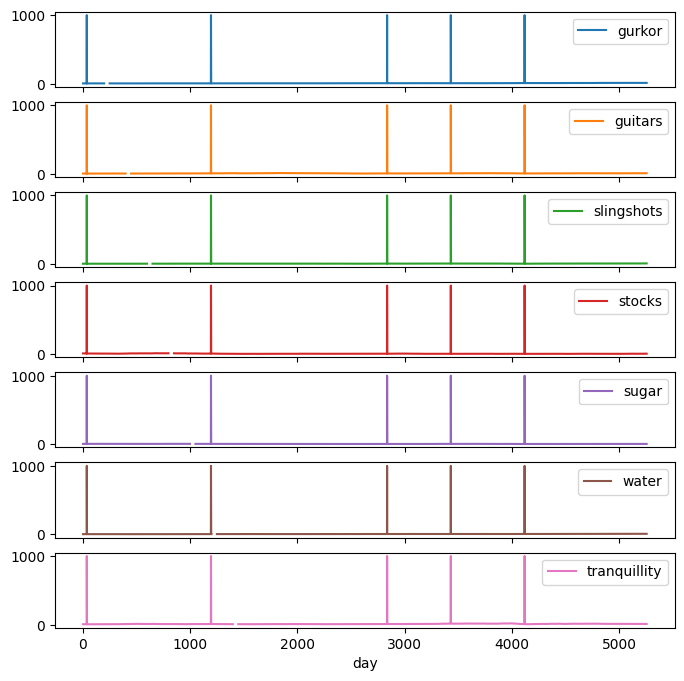

In [4]:
data.set_index("day", inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.plot(subplots=True, figsize=(8,8), )



##### We want to clean up the data by removing the spikes

<Axes: xlabel='day'>

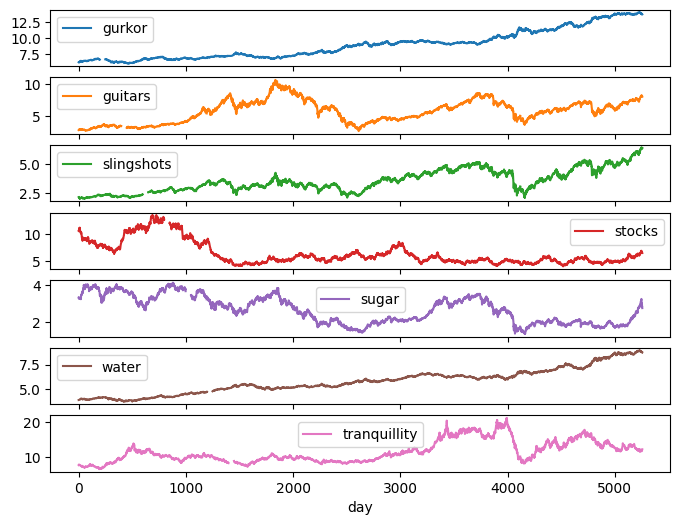

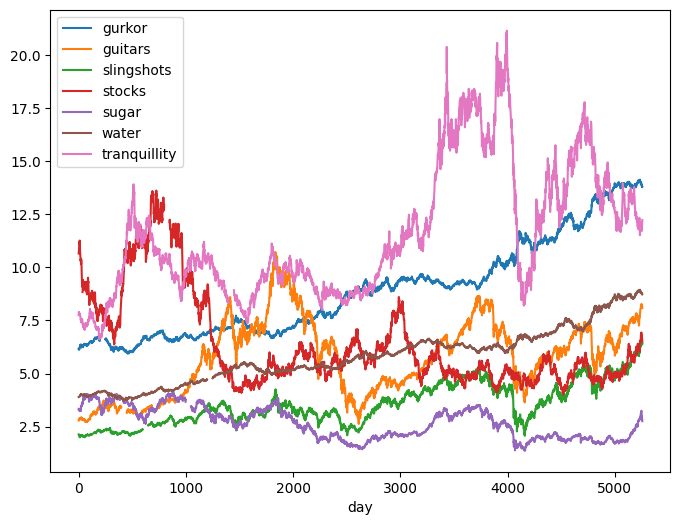

In [5]:
data_filtered = data.copy()

data_filtered[data_filtered >= 500] = np.nan
data_filtered.plot(subplots=True, figsize=(8,6), )
data_filtered.plot(figsize=(8,6))

The filtered result looks much better. From looking at the plots (gurkor, water) and (guitars, slingshots) seem to have a ?similar? trend. We also see a large market crash around day 4000 for a lot of them.

In [6]:
data_filtered.describe()

gurkor      guitars   slingshots       stocks        sugar  \
count  5201.000000  5201.000000  5201.000000  5201.000000  5201.000000   
mean      8.934701     5.758999     3.562496     6.354767     2.663530   
std       2.268289     1.756993     0.973406     2.139400     0.727010   
min       5.942896     2.629048     2.001362     4.012346     1.370262   
25%       6.947150     4.252728     2.804869     4.916920     1.999030   
50%       8.905505     5.907840     3.383130     5.520531     2.605522   
75%      10.183919     7.055568     4.291411     6.946382     3.279982   
max      14.132395    10.719387     6.468982    13.613052     4.125193   

             water  tranquillity  
count  5201.000000   5201.000000  
mean      5.794586     11.552924  
std       1.275024      3.067634  
min       3.739412      6.614749  
25%       4.996563      9.186268  
50%       5.774852     10.584870  
75%       6.488217     13.380483  
max       8.949187     21.137953

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

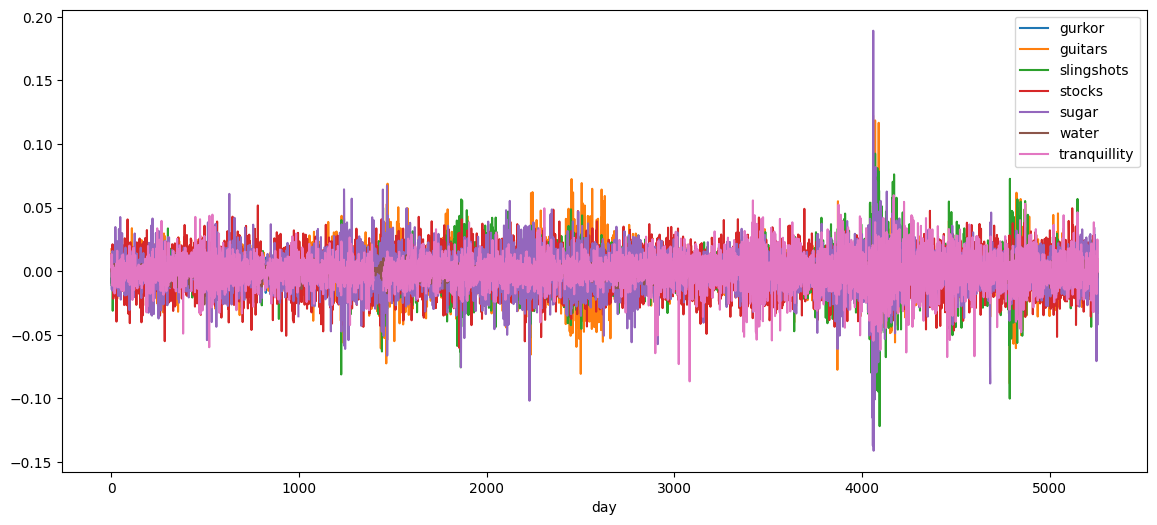

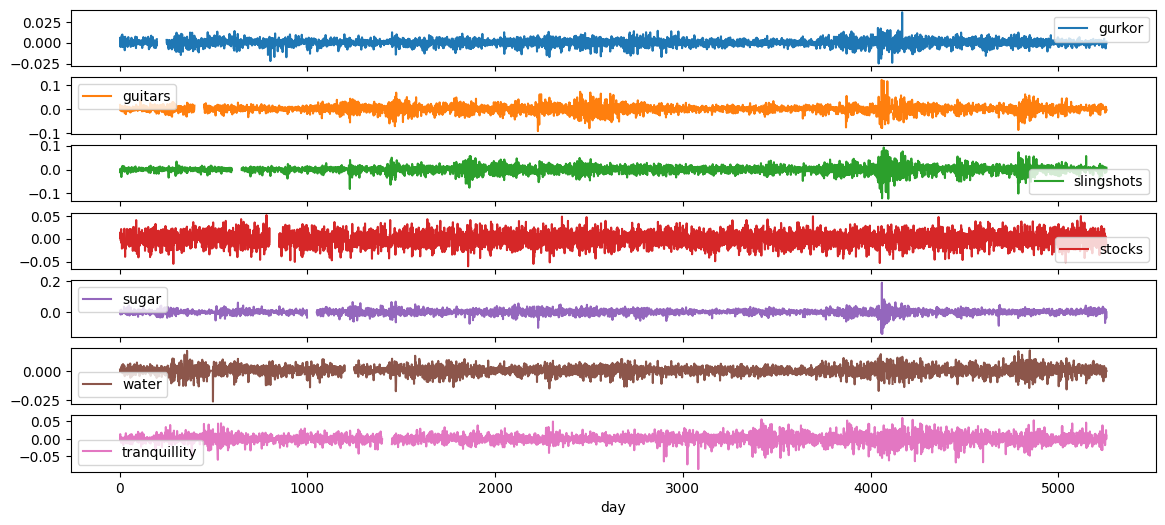

In [7]:
log_returns = np.log( data_filtered / data_filtered.shift(1))

log_returns.plot(figsize=(14,6))
log_returns.plot(subplots=True, figsize=(14,6))

#### Use ADF test to check if log returns are stationary. 
The log returns have no trend. Null hypo is *this series is non-stationary* if p-value is small enough we can reject this aka its stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller

print("ADF Test Results (log returns):")
for col in log_returns.columns:
    result = adfuller(log_returns[col].dropna())
    print(f"{col}: ADF={result[0]:.4f}, p-value={result[1]:5f}")


ADF Test Results (log returns):
gurkor: ADF=-53.1885, p-value=0.000000
guitars: ADF=-12.1853, p-value=0.000000
slingshots: ADF=-19.1148, p-value=0.000000
stocks: ADF=-72.1206, p-value=0.000000
sugar: ADF=-36.8048, p-value=0.000000
water: ADF=-43.1526, p-value=0.000000
tranquillity: ADF=-73.5667, p-value=0.000000


#### Calculating the correlation between the log returns

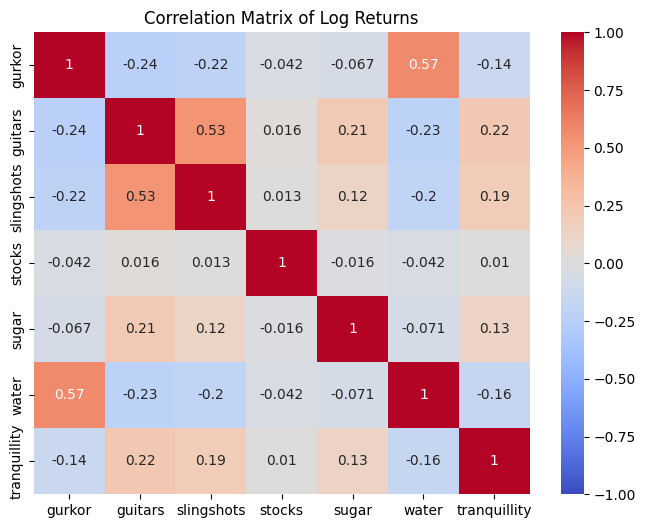

gurkor   guitars  slingshots    stocks     sugar     water  \
gurkor        1.000000 -0.241075   -0.216712 -0.041636 -0.066739  0.573293   
guitars      -0.241075  1.000000    0.526253  0.016316  0.211811 -0.226021   
slingshots   -0.216712  0.526253    1.000000  0.013391  0.118452 -0.201113   
stocks       -0.041636  0.016316    0.013391  1.000000 -0.015689 -0.042117   
sugar        -0.066739  0.211811    0.118452 -0.015689  1.000000 -0.071434   
water         0.573293 -0.226021   -0.201113 -0.042117 -0.071434  1.000000   
tranquillity -0.137819  0.223933    0.188563  0.010027  0.126743 -0.157992   

              tranquillity  
gurkor           -0.137819  
guitars           0.223933  
slingshots        0.188563  
stocks            0.010027  
sugar             0.126743  
water            -0.157992  
tranquillity      1.000000

In [9]:
import seaborn as sns

corr_matrix = log_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Log Returns")
plt.show()

corr_matrix

Find high correlation for (water, gurkor) and (slingshots, guitars) as we guessed from the plots. A lot of pairs have mild correlation some like (stocks, tranquility) have none.

Need to find some tools to classify groups

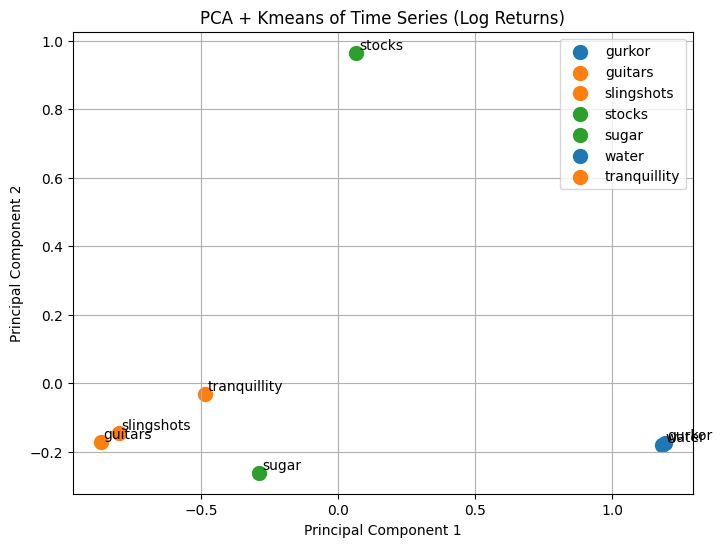

{np.int32(0): ['gurkor', 'water'],
 np.int32(1): ['guitars', 'slingshots', 'tranquillity'],
 np.int32(2): ['stocks', 'sugar']}

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(corr_matrix)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(corr_matrix)

plt.figure(figsize=(8, 6))
for i, name in enumerate(corr_matrix.columns):
    plt.scatter(pca_components[i, 0], pca_components[i, 1], c=f"C{labels[i]}", label=name, s=100)
    plt.text(pca_components[i, 0]+0.01, pca_components[i, 1]+0.01, name)

plt.title("PCA + Kmeans of Time Series (Log Returns)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


clustered_groups = {i: [] for i in set(labels)}
for idx, label in enumerate(labels):
    clustered_groups[label].append(corr_matrix.columns[idx])

clustered_groups

Need to understand PCA better

Rolling volatility (50 days):
Rolling mean on log returns (50  days):
Rolling mean on filtered data (50  days):


array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

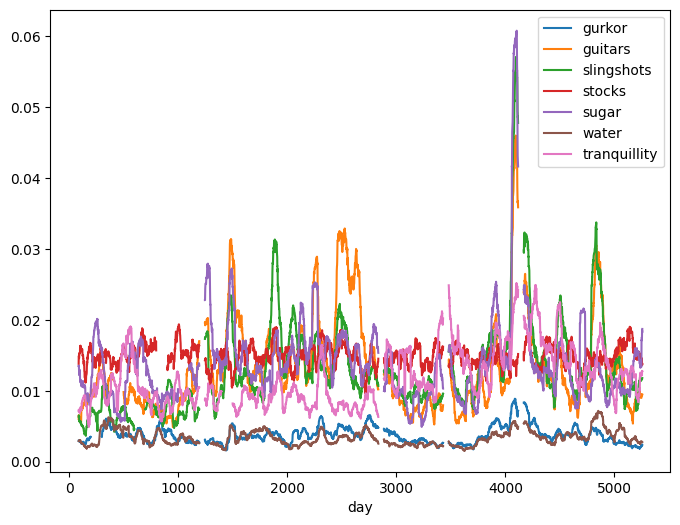

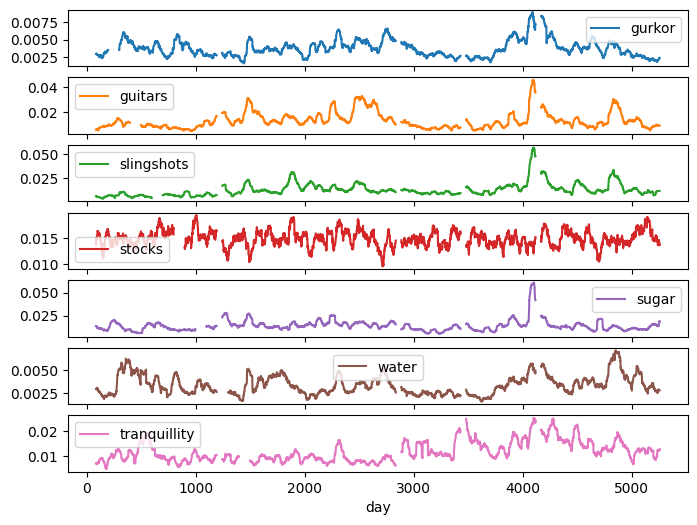

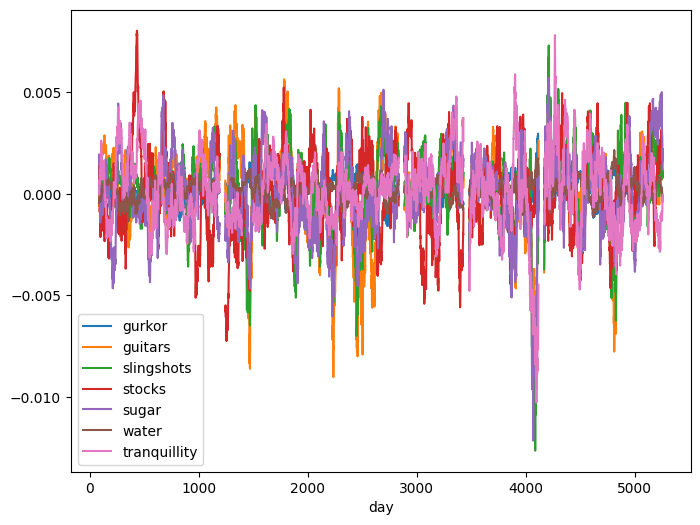

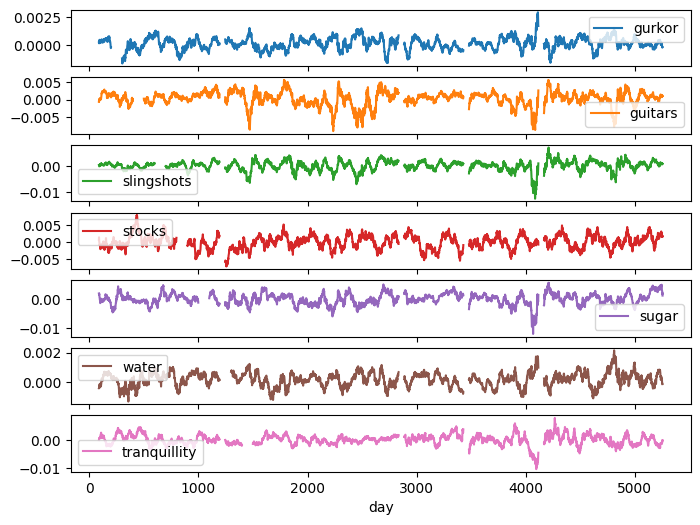

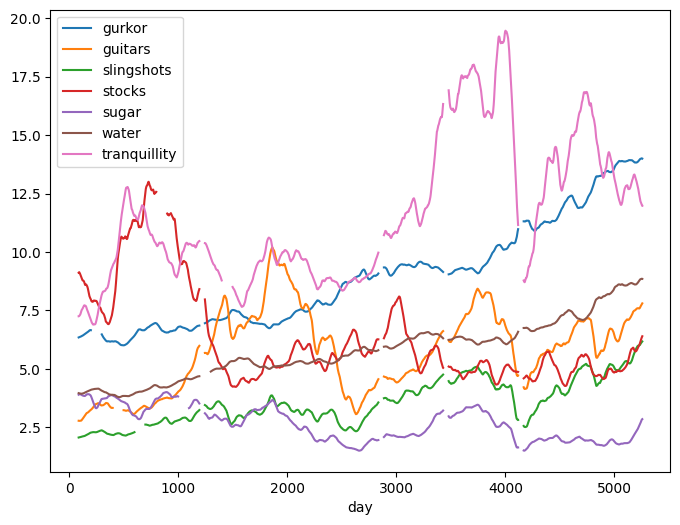

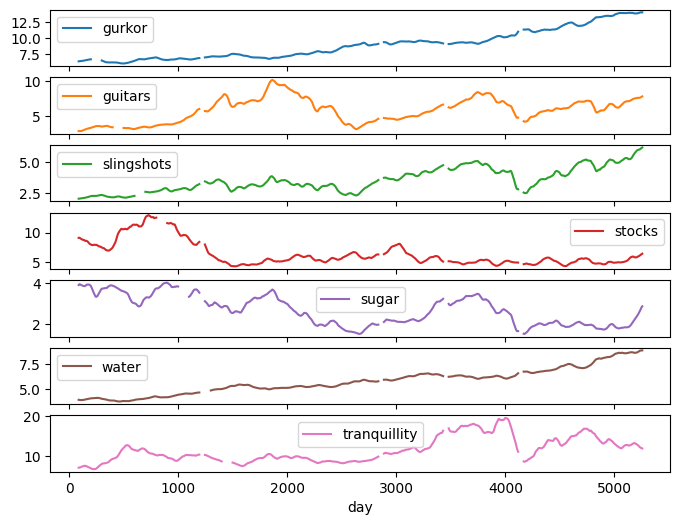

In [11]:
print("Rolling volatility (50 days):")
rolling_volatility = log_returns.rolling(window=50).std()
rolling_volatility.plot(figsize=(8,6))
rolling_volatility.plot(figsize=(8,6), subplots=True)

print("Rolling mean on log returns (50  days):")
rolling_mean = log_returns.rolling(window=50 ).mean()
rolling_mean.plot(figsize=(8,6))
rolling_mean.plot(figsize=(8,6), subplots=True)

print("Rolling mean on filtered data (50  days):")
rolling_mean = data_filtered.rolling(window=50 ).mean()
rolling_mean.plot(figsize=(8,6))
rolling_mean.plot(figsize=(8,6), subplots=True)


#### MSTL DECOMPOSITION

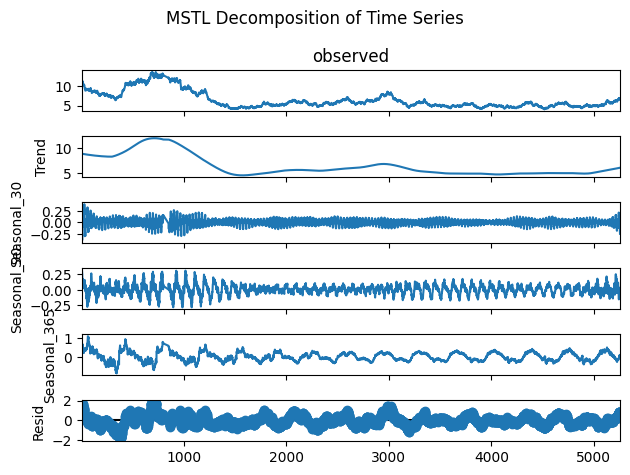

In [12]:
from statsmodels.tsa.seasonal import MSTL

series = data_filtered["stocks"].dropna()

mstl = MSTL(series, periods=[30,90,365])
result = mstl.fit()
result.plot()
plt.suptitle("MSTL Decomposition of Time Series")
plt.tight_layout()
plt.show()


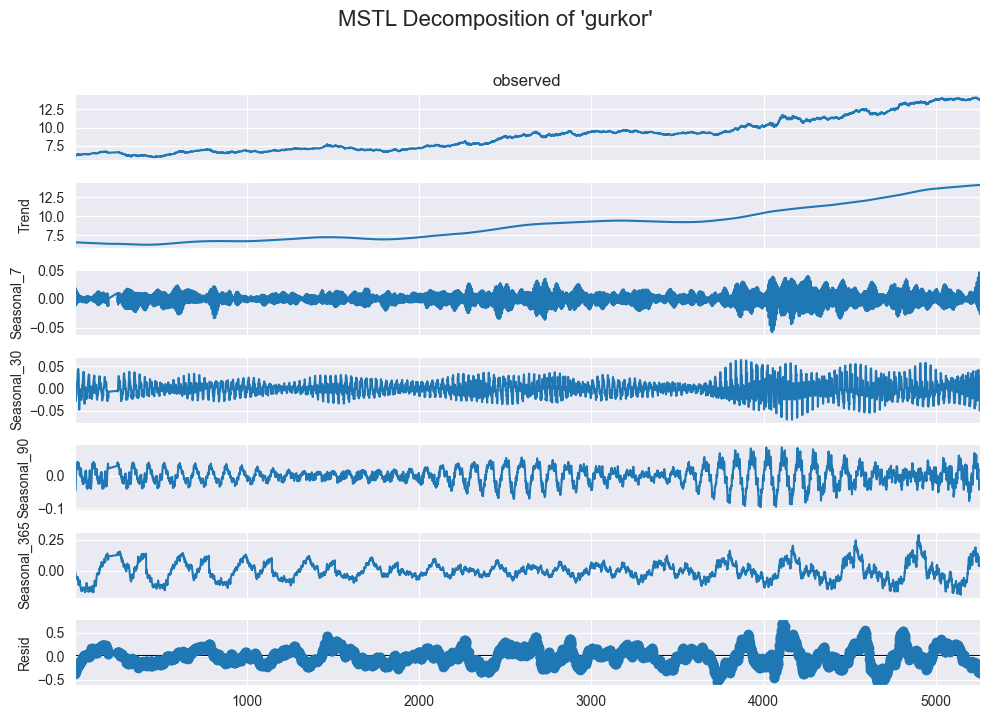

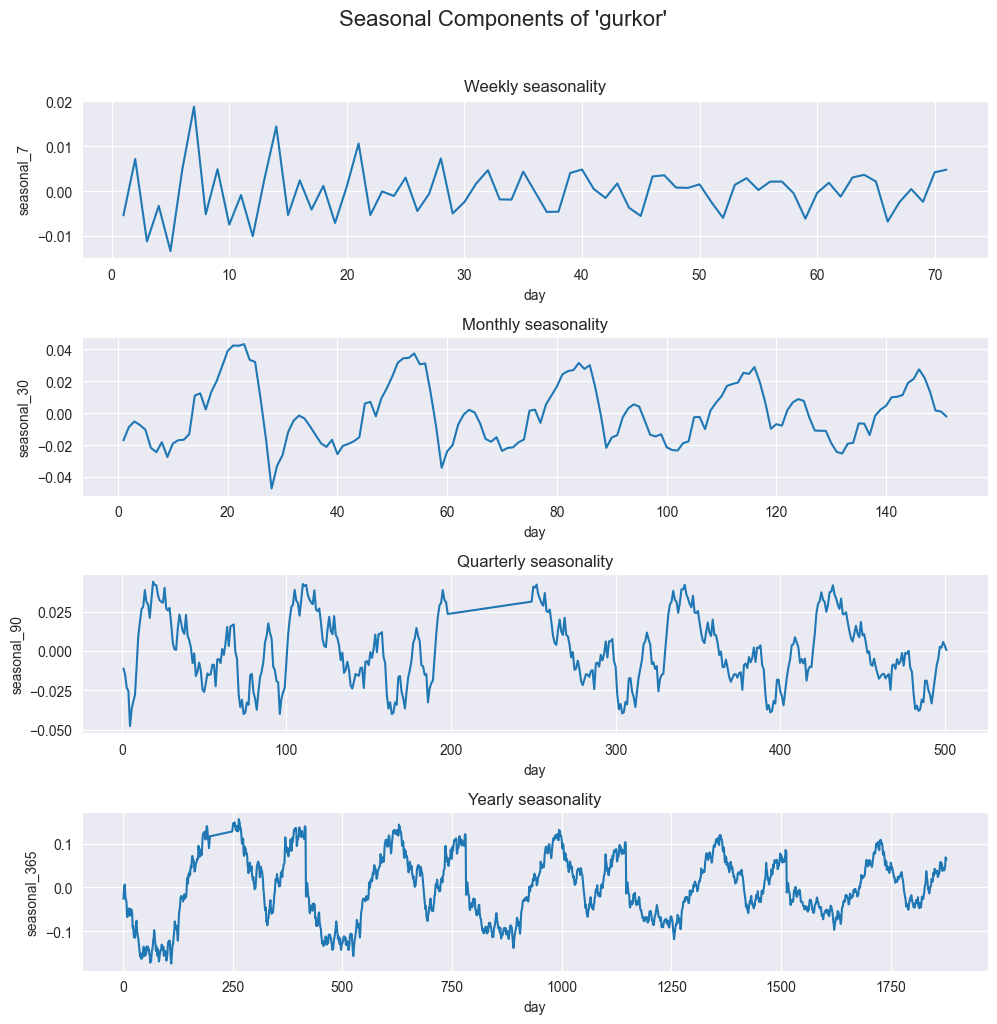

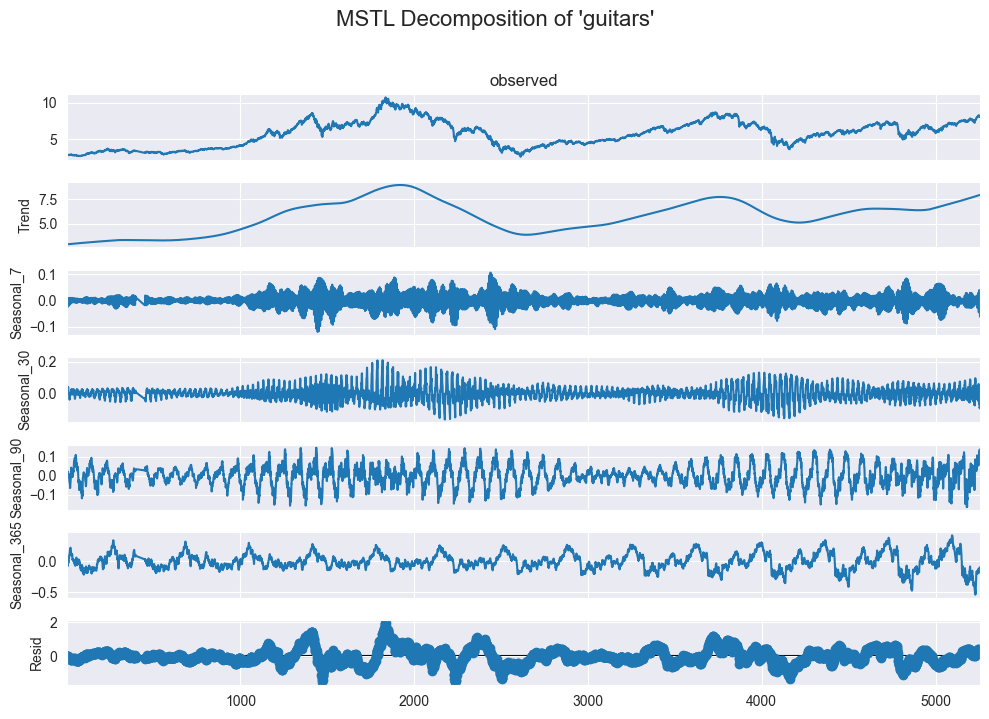

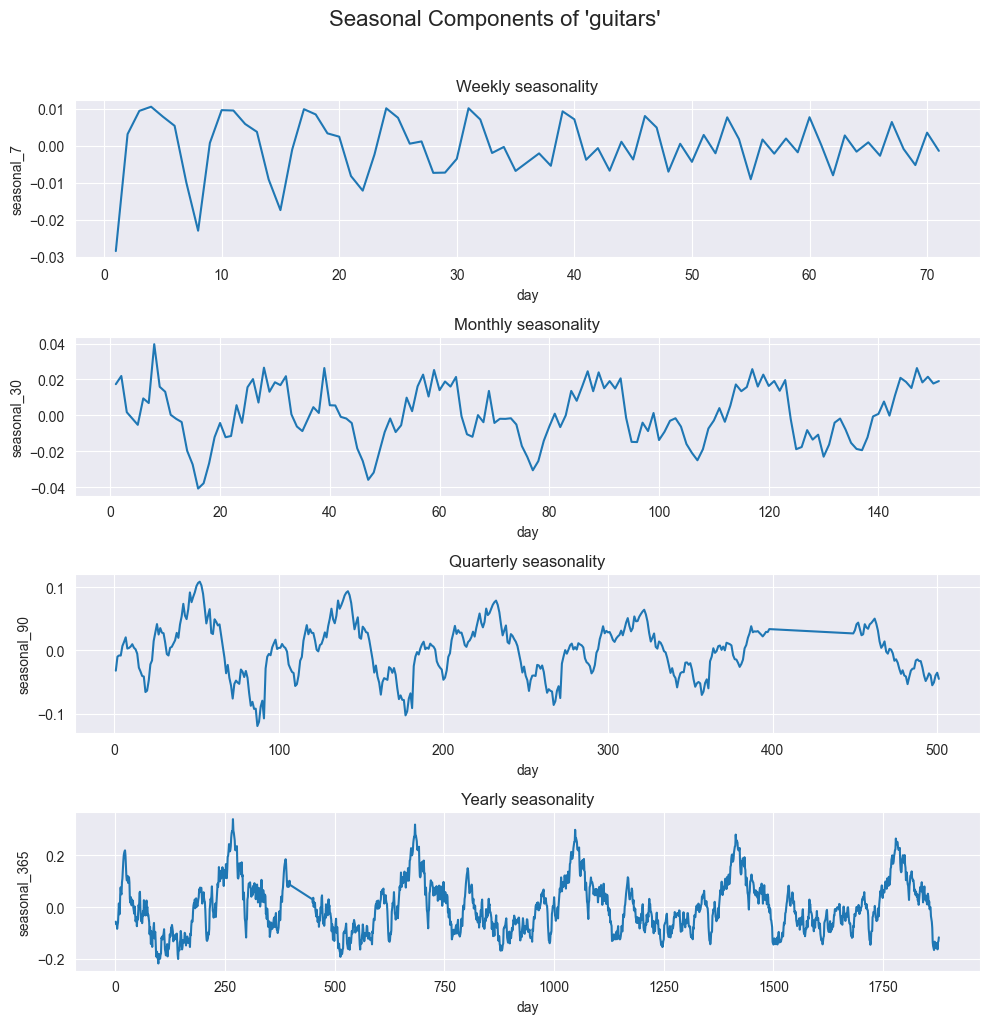

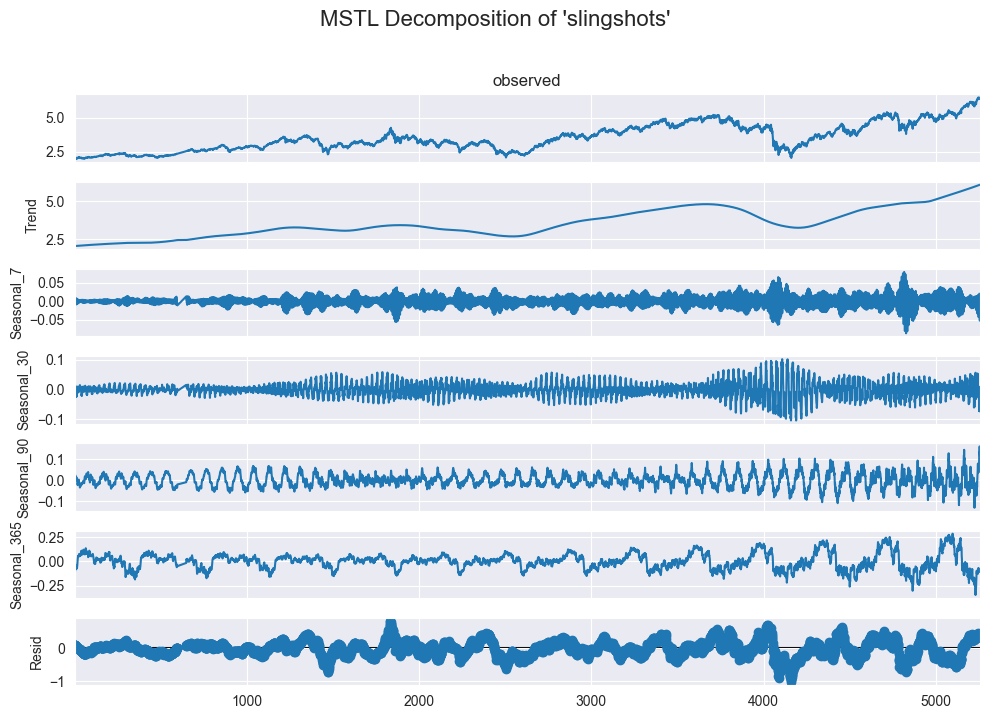

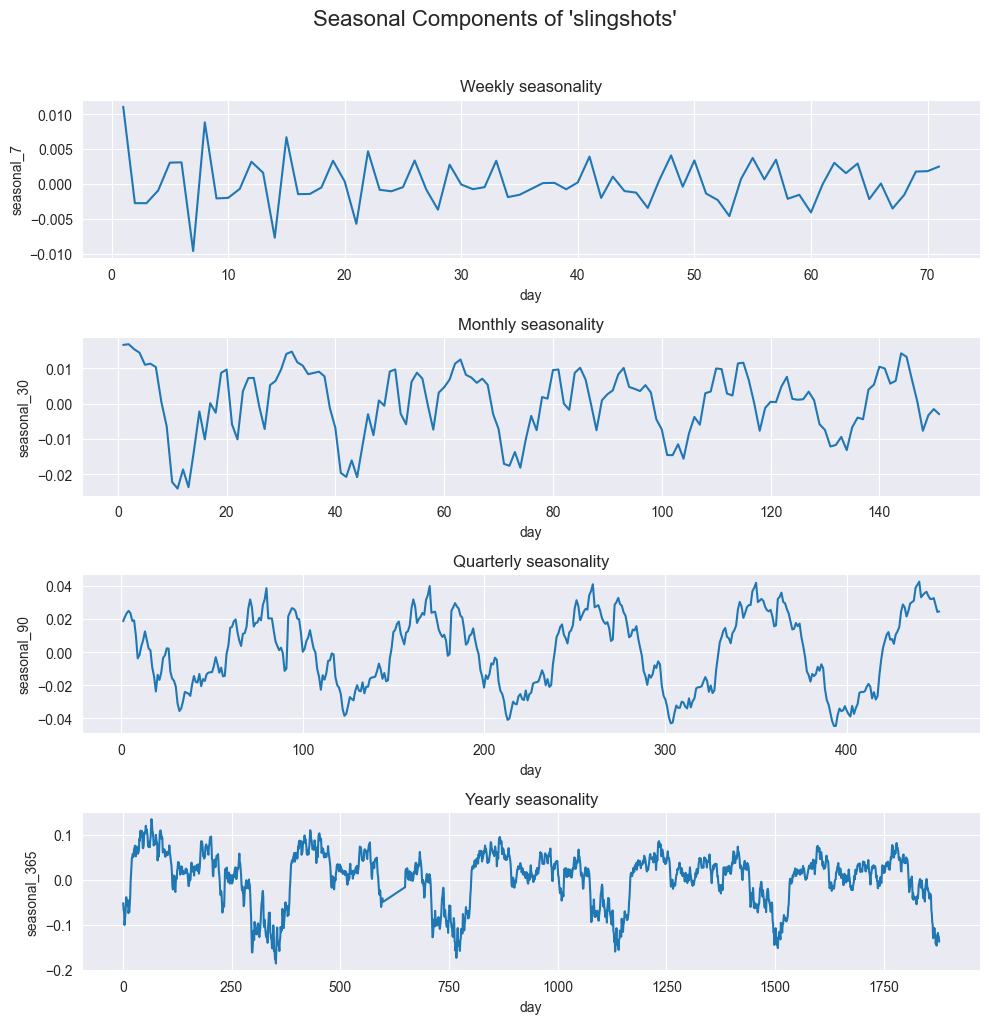

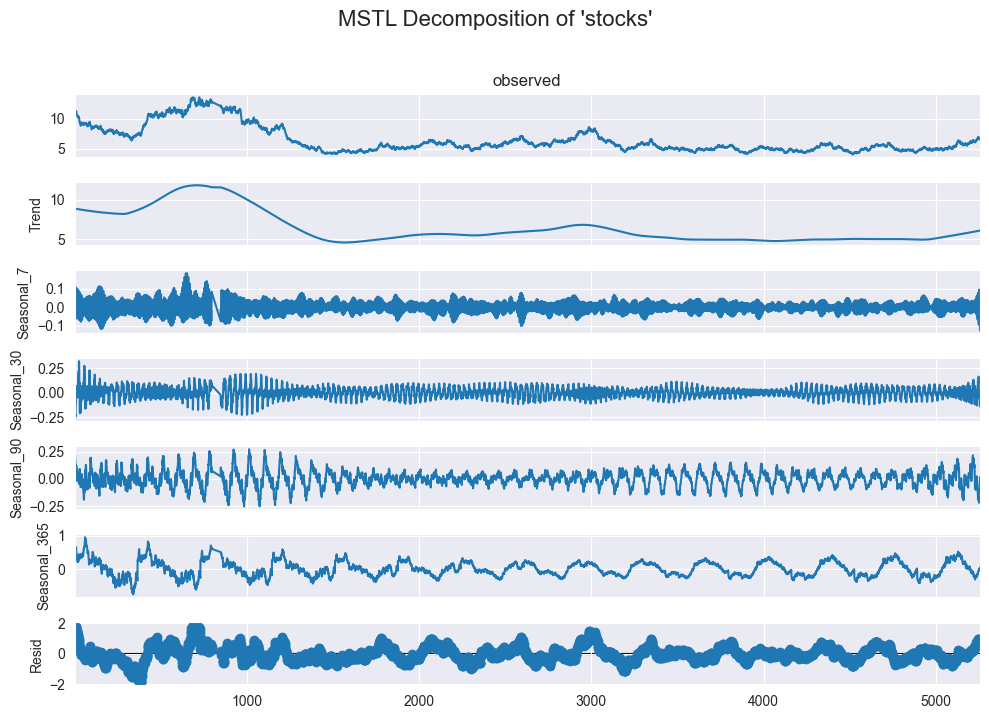

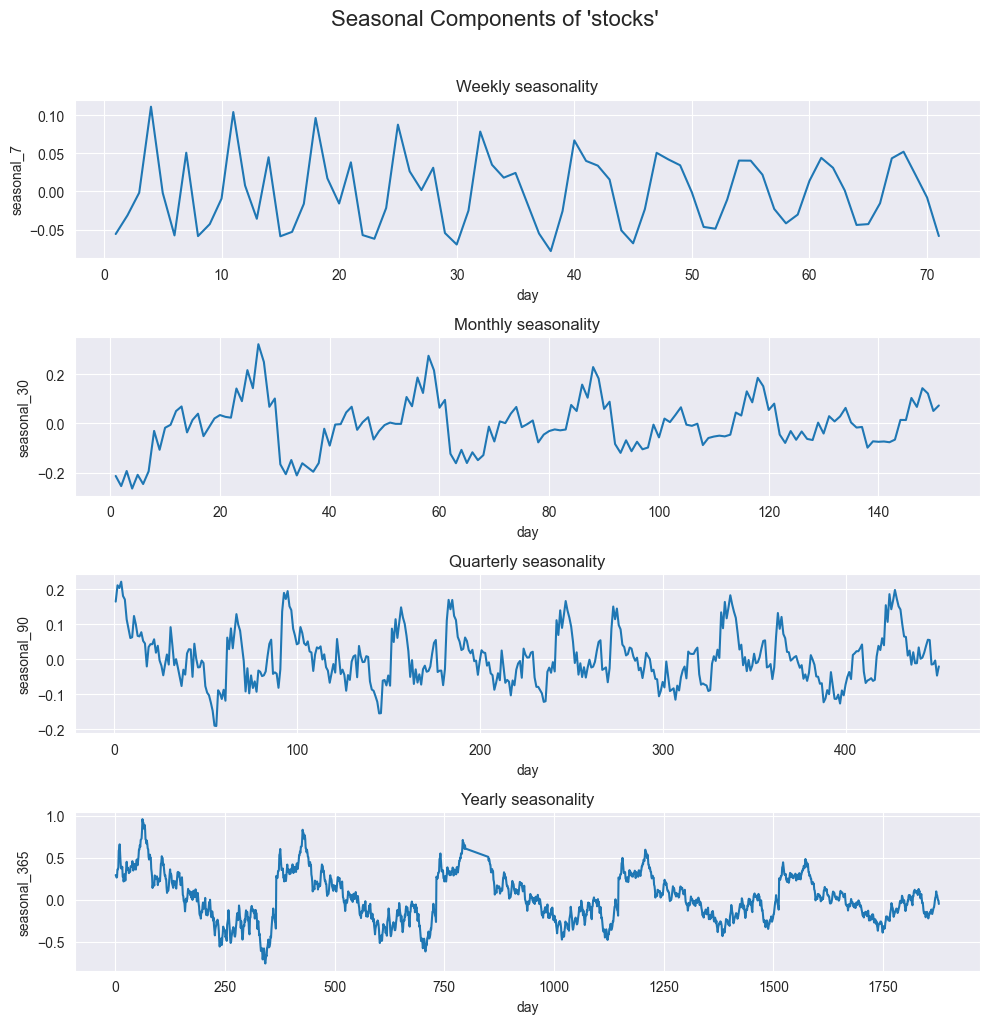

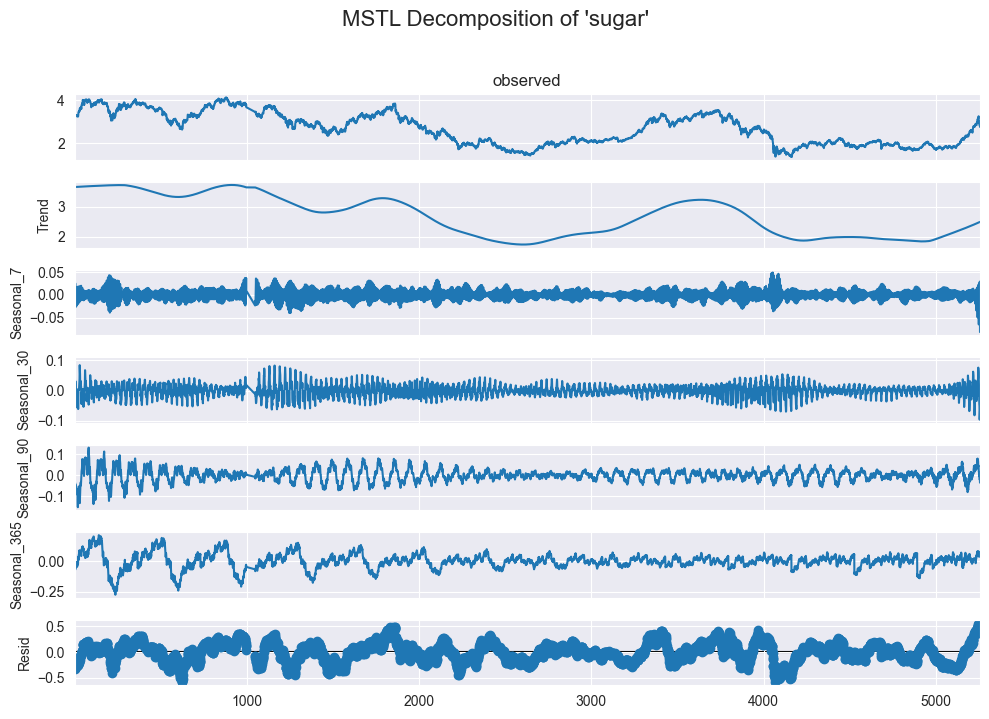

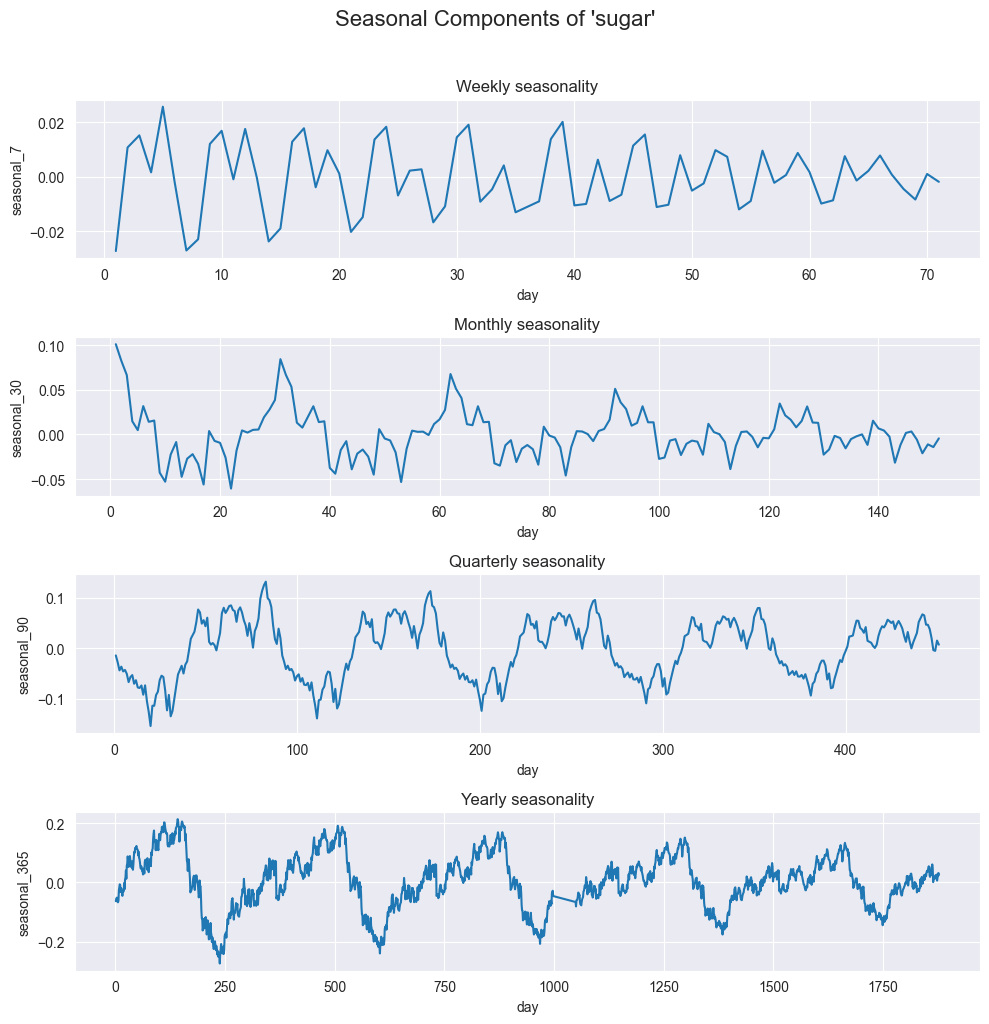

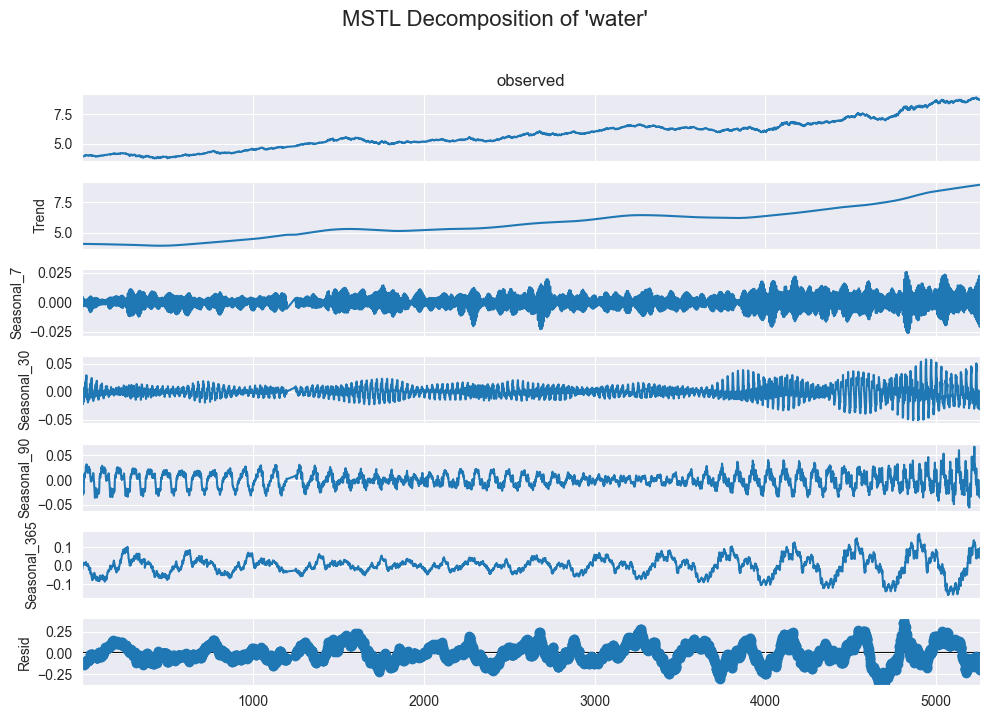

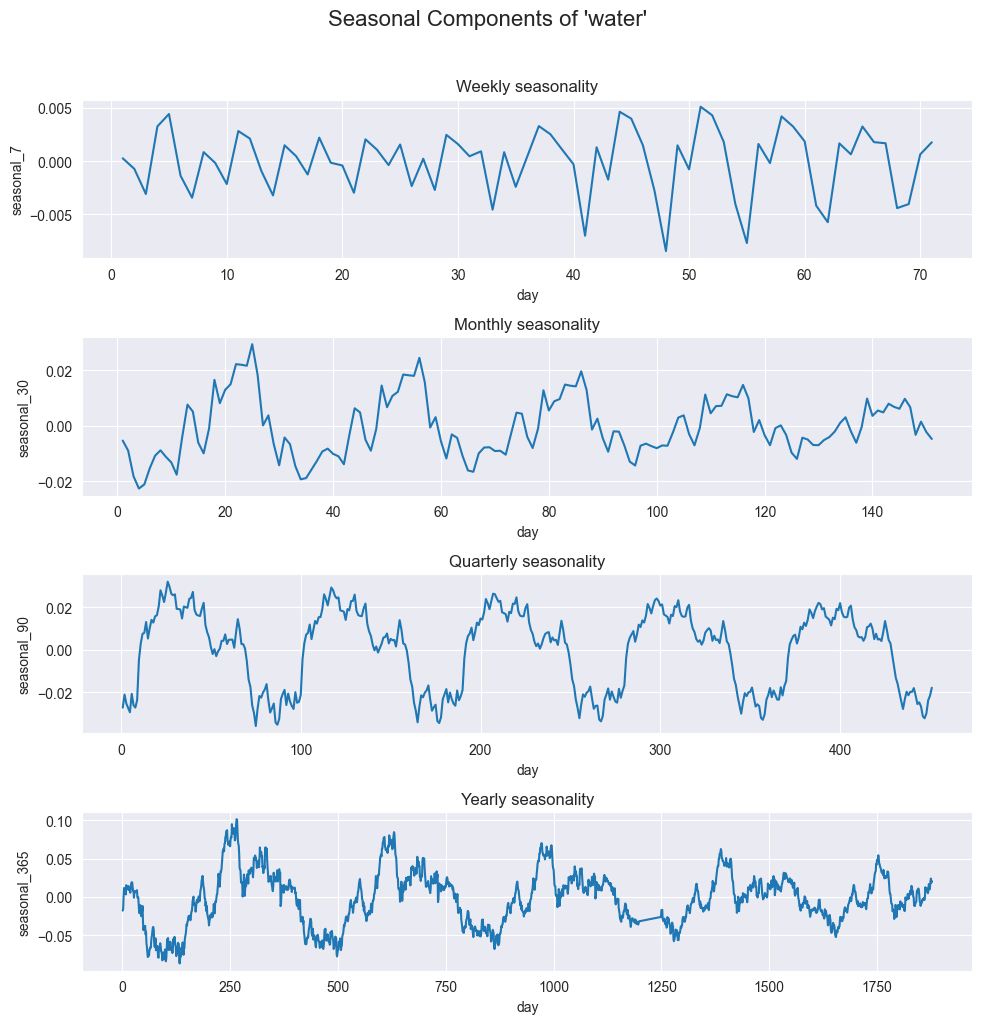

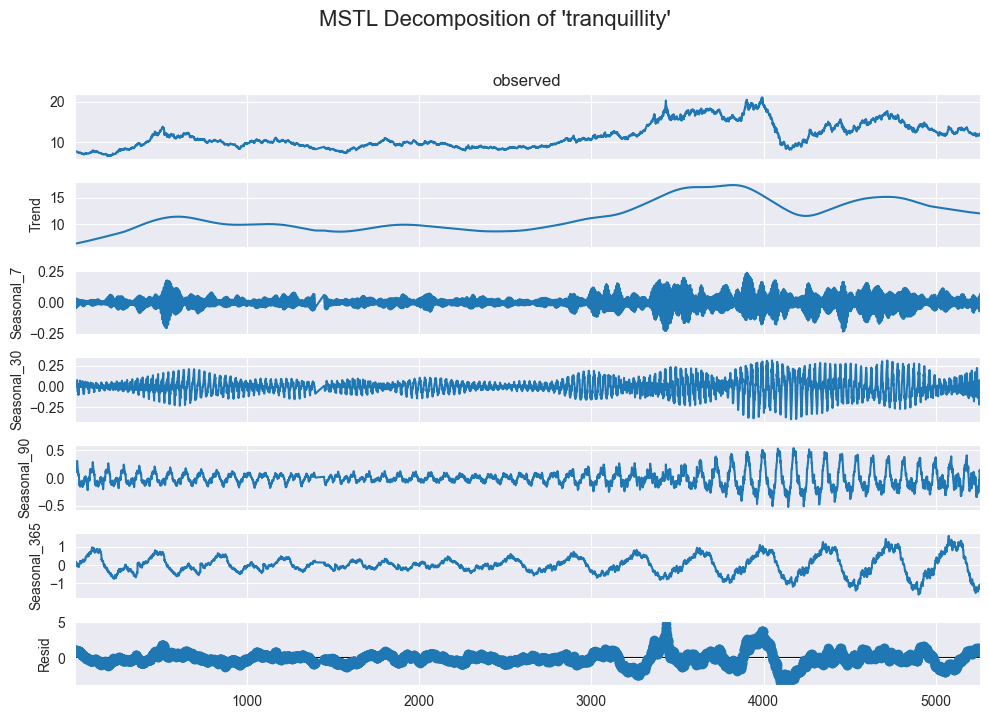

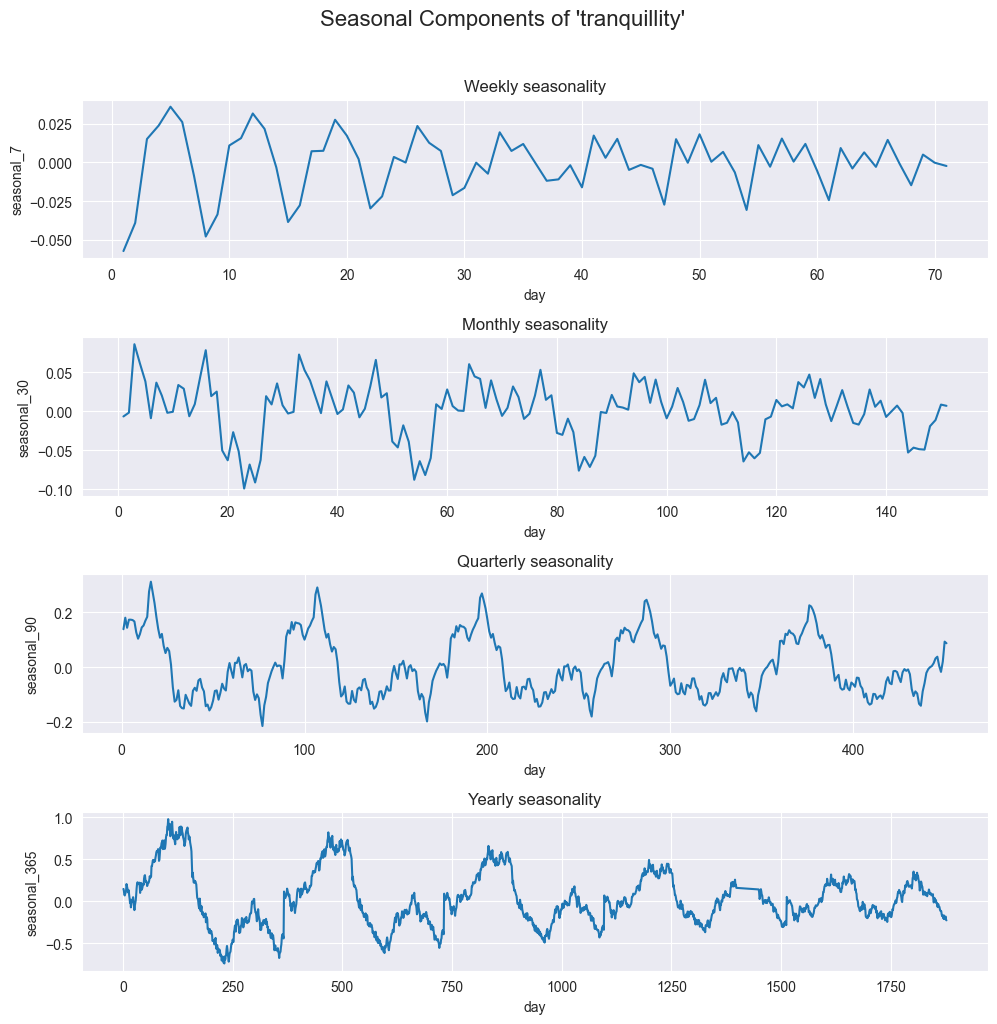

In [18]:
periods = [7,30,90,365]  # Weekly, monthly, quaterly, yearly
sns.set_style("darkgrid")

# Loop over each series
for col in data_filtered.columns:
    series = data_filtered[col].dropna()
    if len(series) < max(periods) * 2:
        print(f"Skipping '{col}' — not enough data.")
        continue

    try:
        mstl = MSTL(series, periods=periods)
        result = mstl.fit()

        # Plotting
        fig = result.plot()
        fig.set_size_inches(10, 7)
        fig.suptitle(f"MSTL Decomposition of '{col}'", fontsize=16, y=1.02)
        fig.fontsize = 6

        
        #plt.xlim(1,7*20)
        #plt.axis('equal')

        plt.tight_layout()
        plt.show()
        

        # Plotting seasonal components separately and zoomed in
        fig1, ax1 = plt.subplots(nrows=4, figsize=[10,10])
        fig1.suptitle(f"Seasonal Components of '{col}'", fontsize=16, y=1.02)
        result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
        ax1[0].set_ylabel("seasonal_7")
        ax1[0].set_title("Weekly seasonality")

        result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
        ax1[1].set_ylabel("seasonal_30")
        ax1[1].set_title("Monthly seasonality")

        result.seasonal["seasonal_90"].iloc[:90*5].plot(ax=ax1[2])
        ax1[2].set_ylabel("seasonal_90")
        ax1[2].set_title("Quarterly seasonality")

        result.seasonal["seasonal_365"].iloc[:365*5].plot(ax=ax1[3])
        ax1[3].set_ylabel("seasonal_365")
        ax1[3].set_title("Yearly seasonality")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not decompose '{col}': {e}")

Försöker kolla lite noggrannare på seasonality. Verkar ändå som att weekly delen kan ignoreras

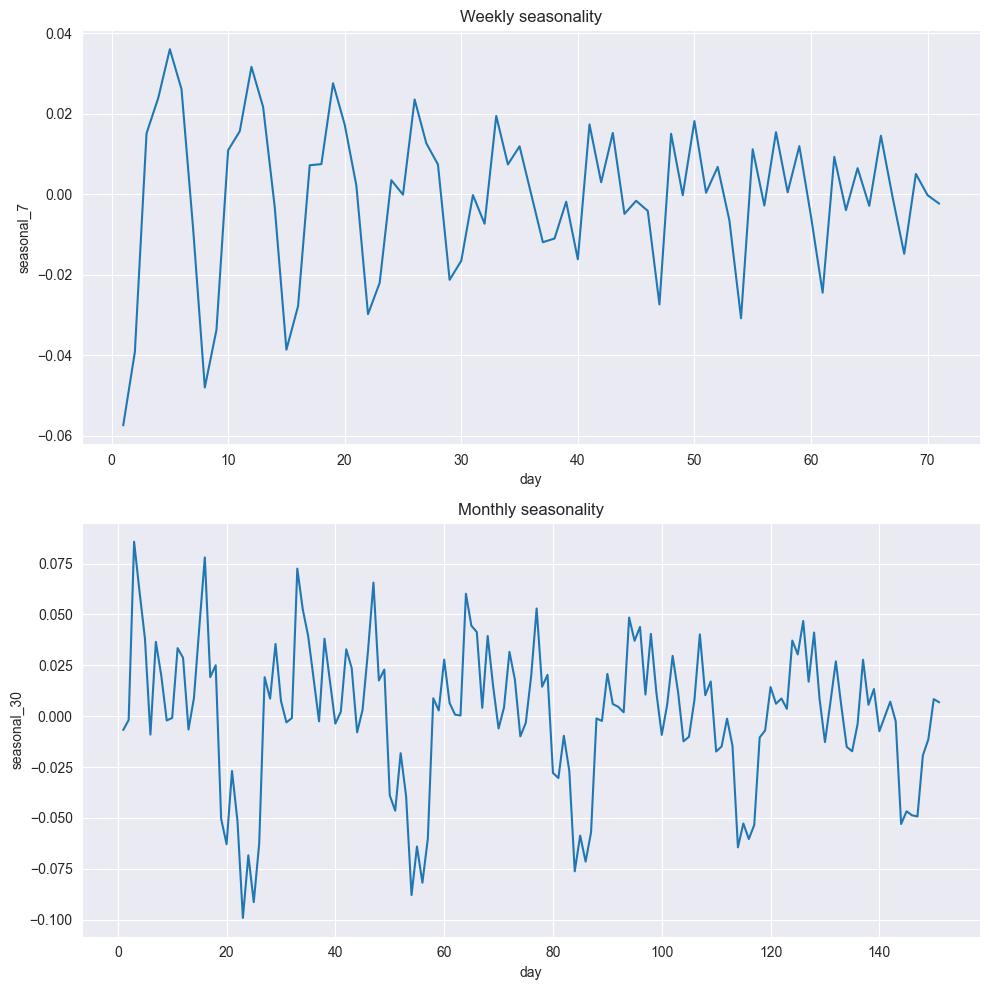

In [14]:
fig1, ax1 = plt.subplots(nrows=2, figsize=[10,10])
result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
ax1[0].set_ylabel("seasonal_7")
ax1[0].set_title("Weekly seasonality")

result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
ax1[1].set_ylabel("seasonal_30")
ax1[1].set_title("Monthly seasonality")

plt.tight_layout()
plt.show()

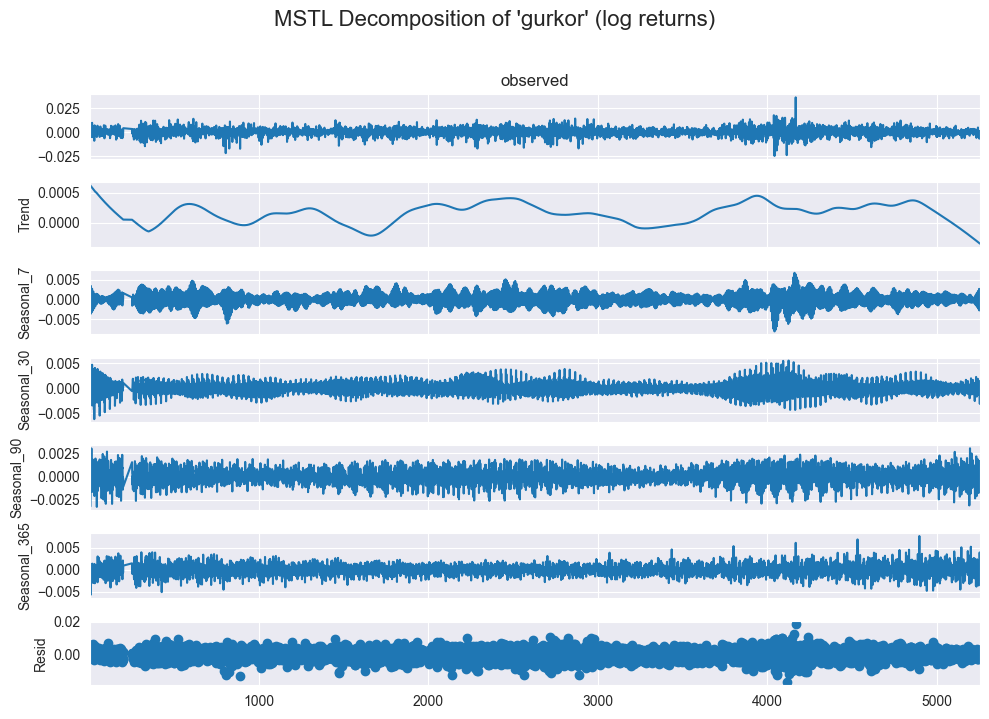

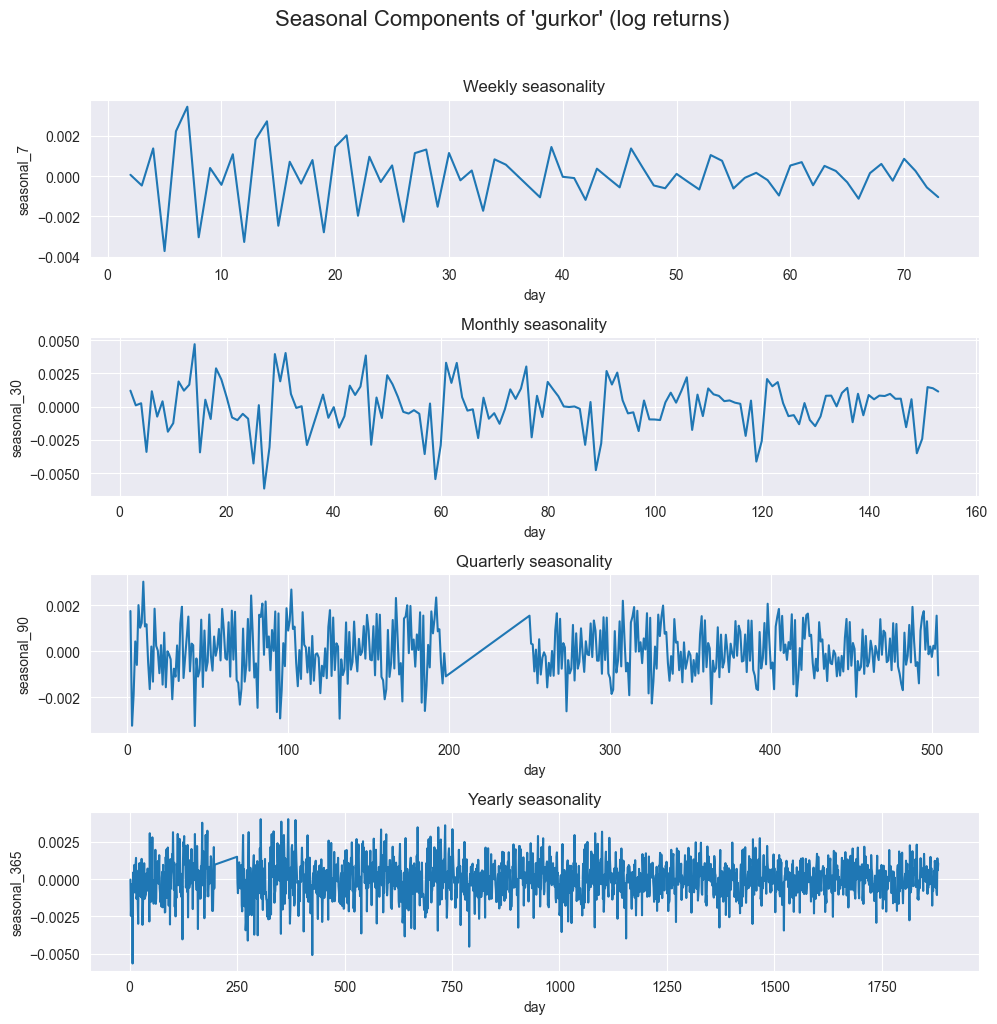

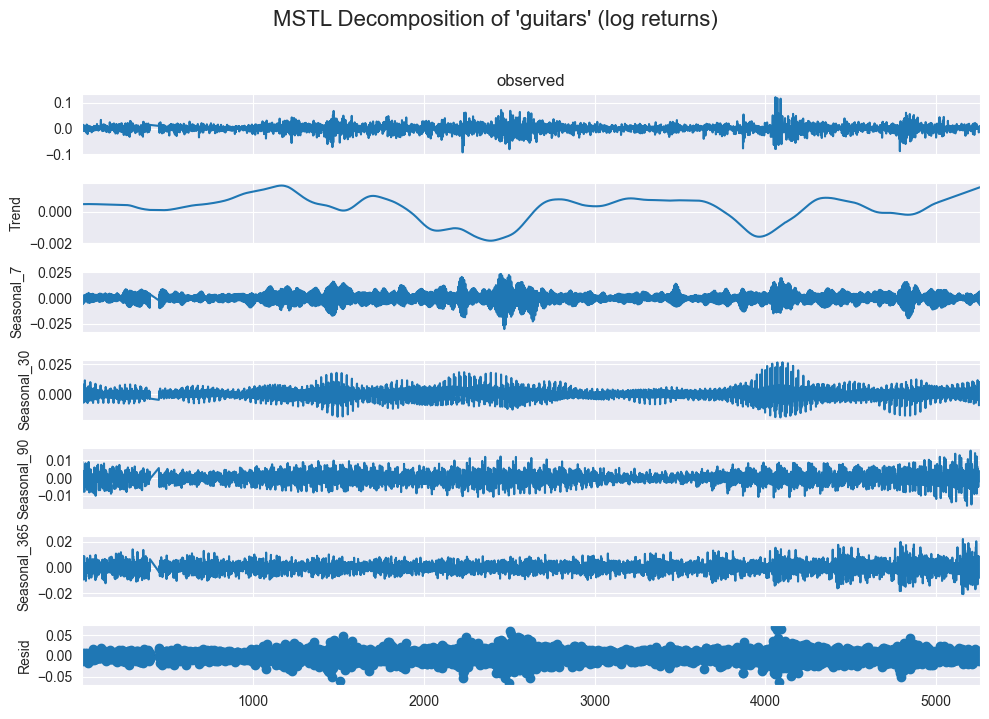

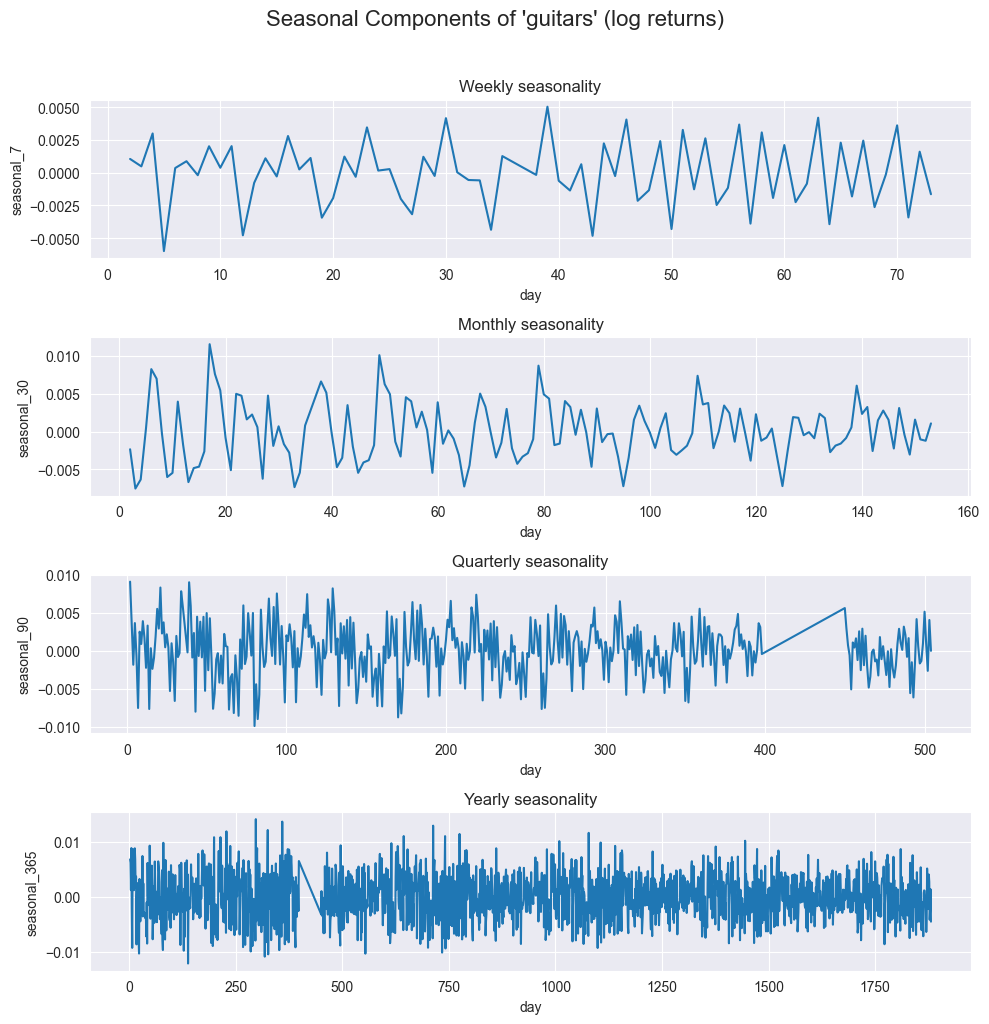

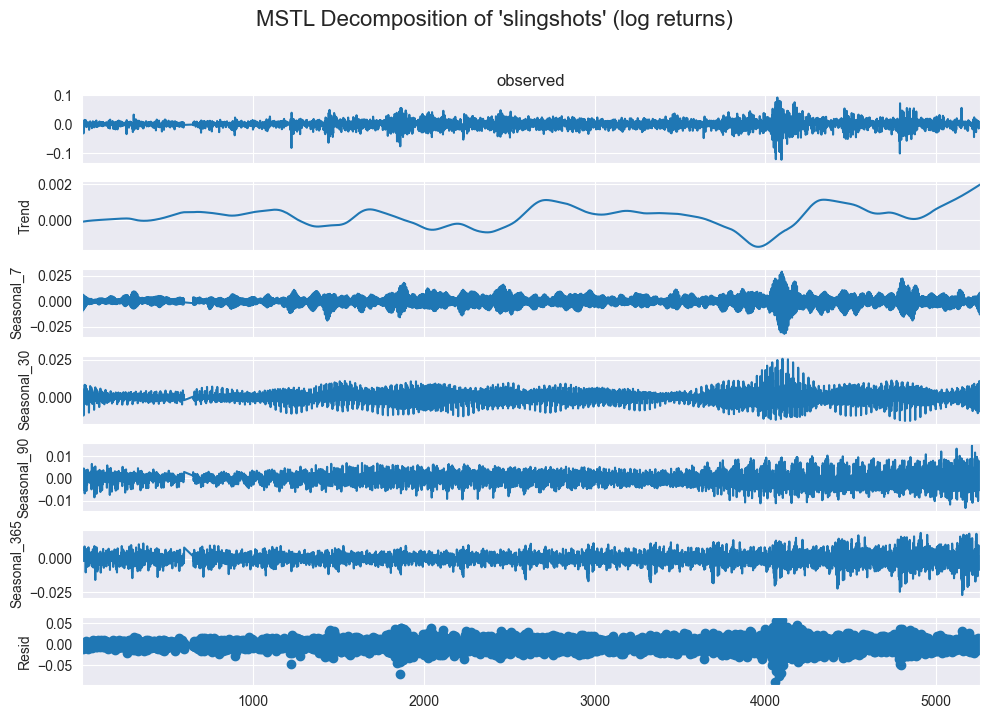

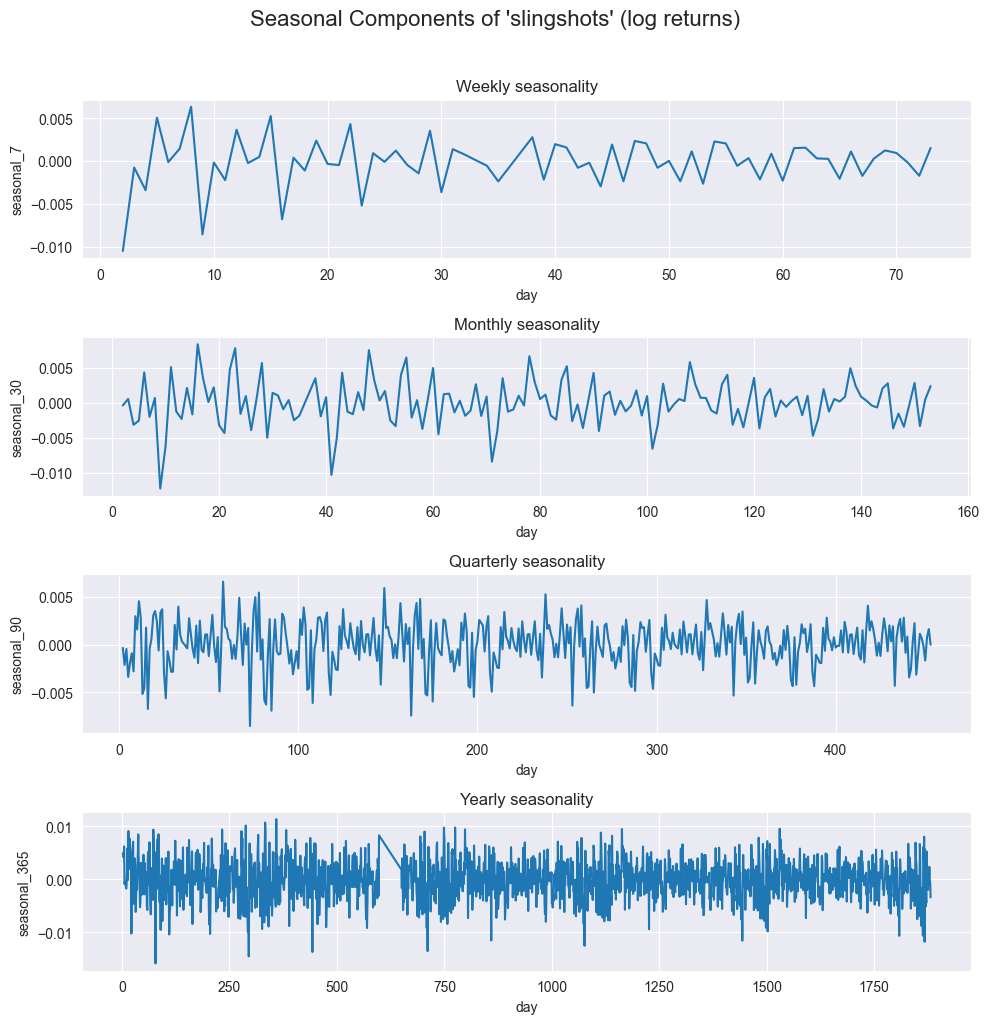

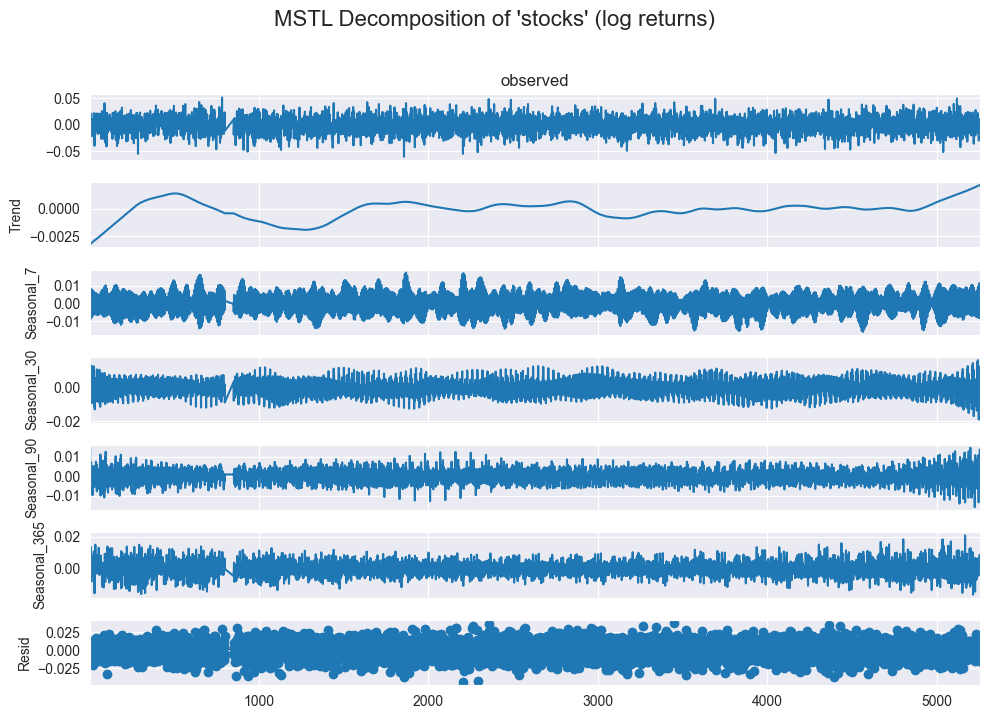

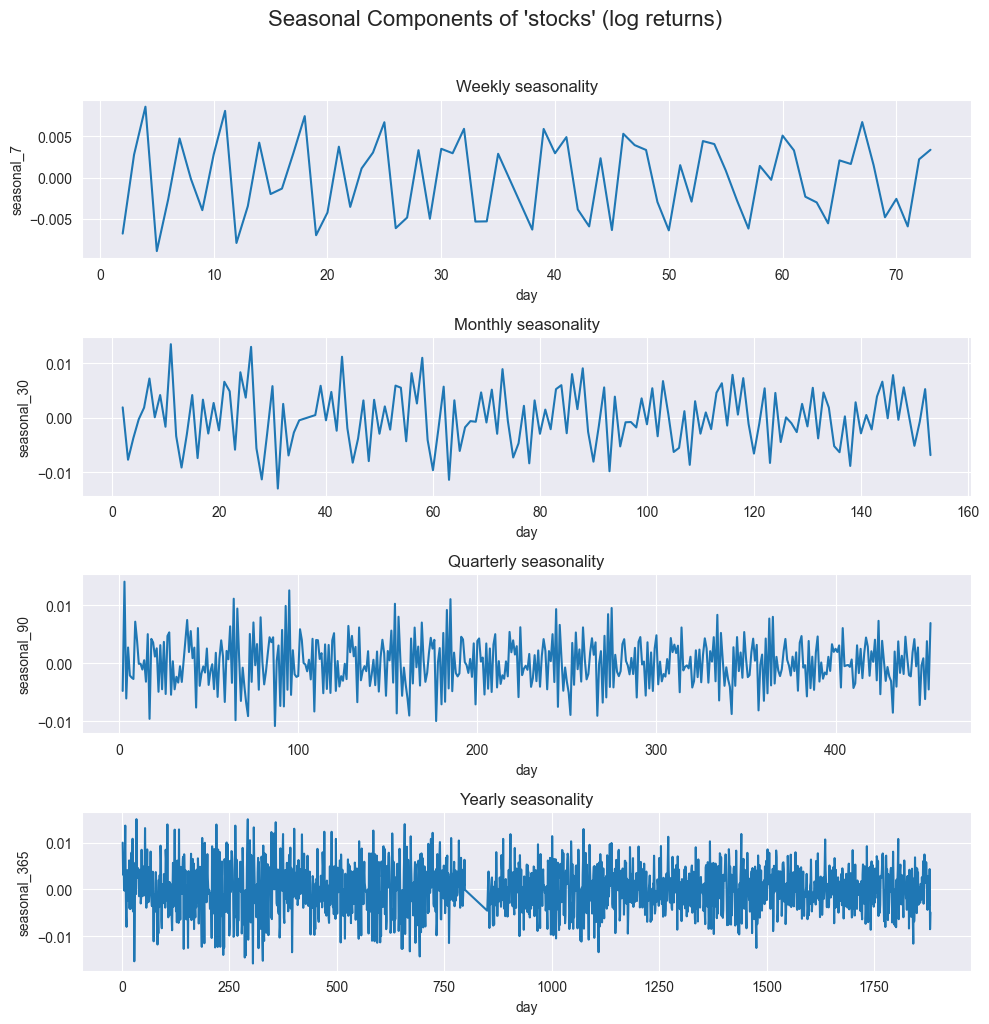

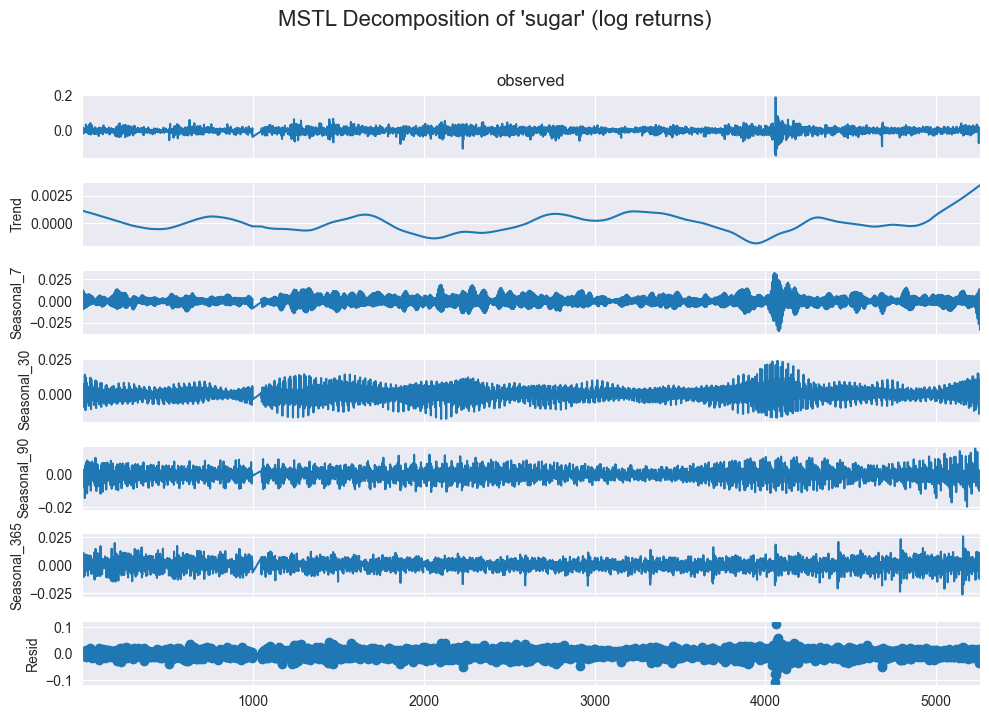

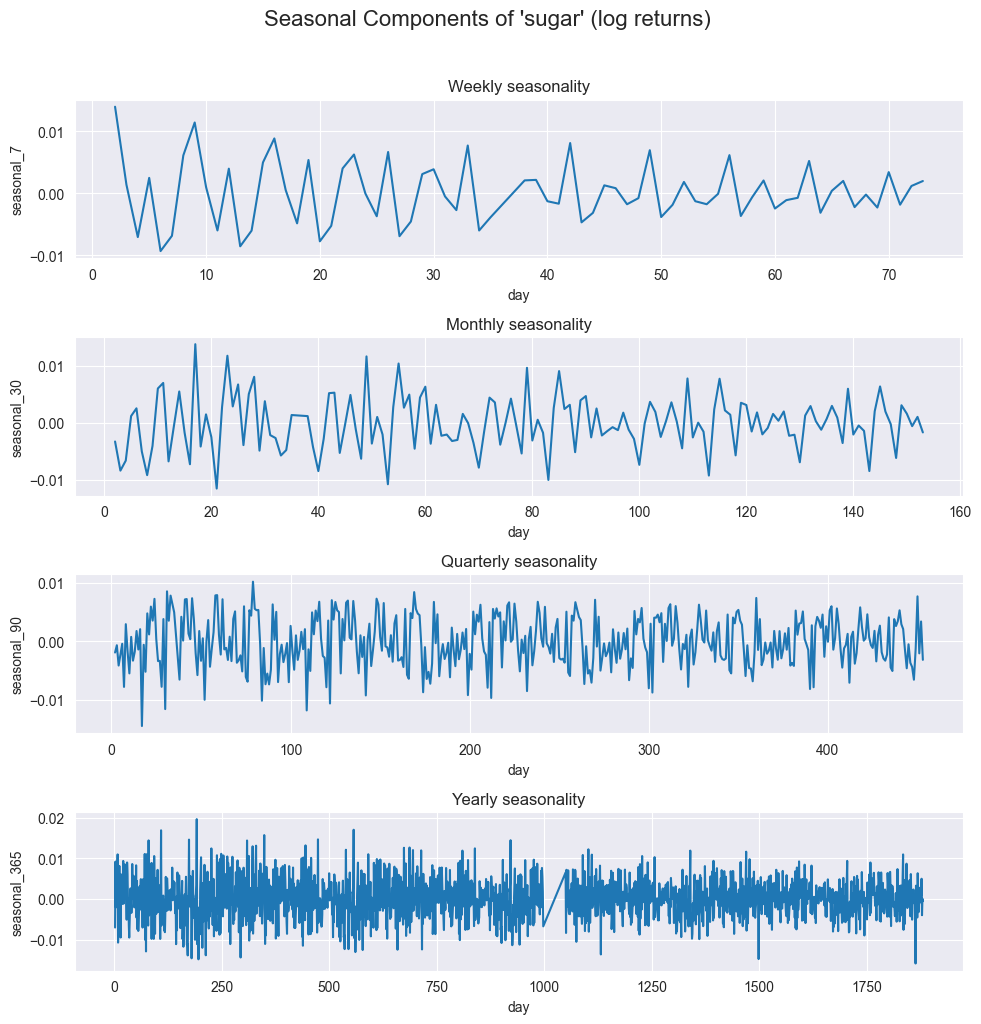

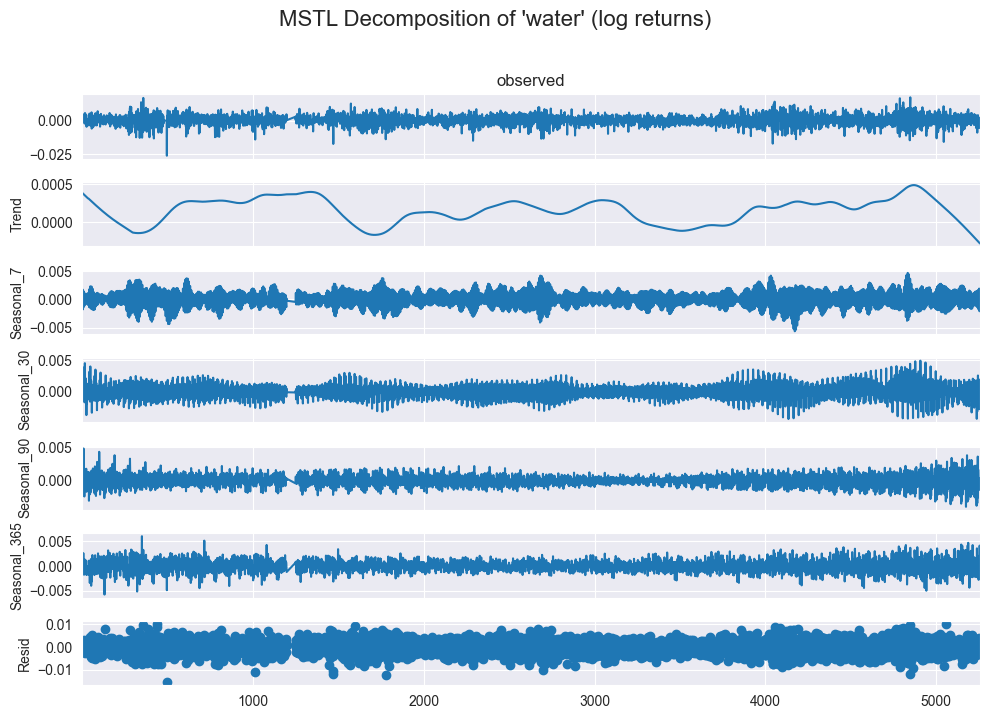

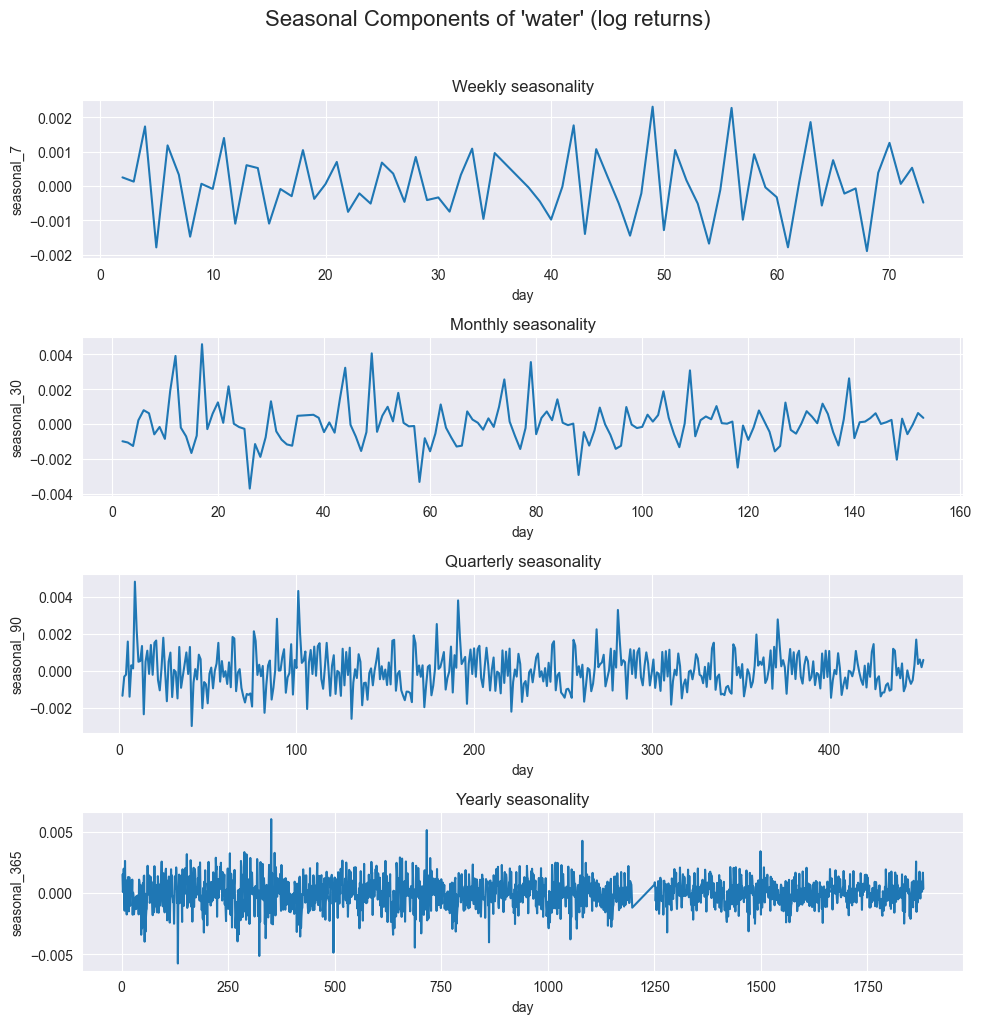

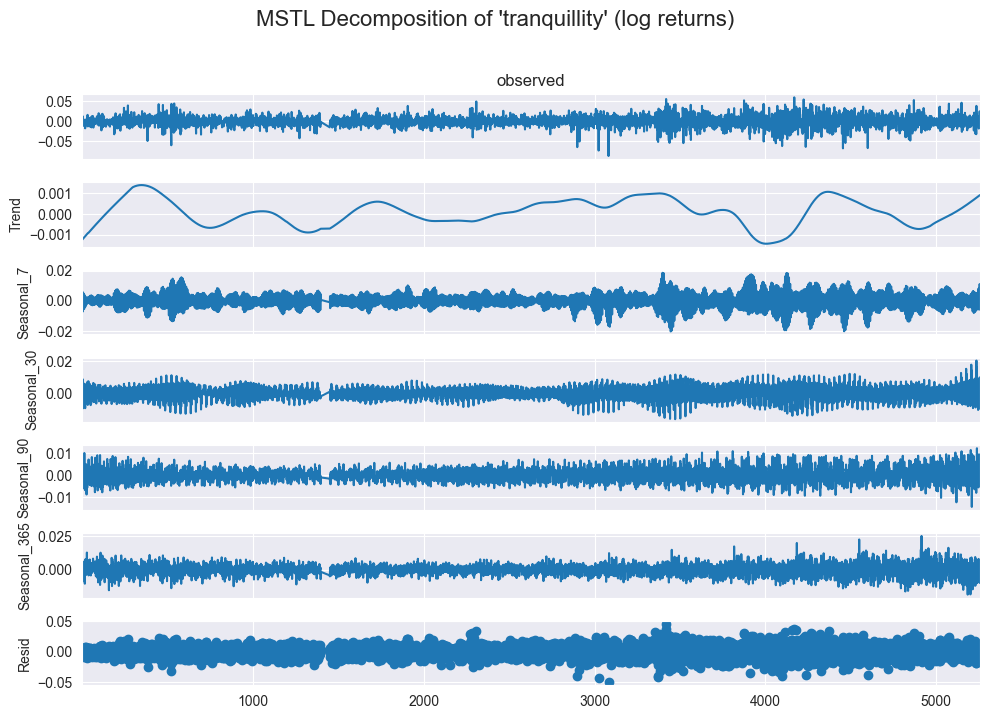

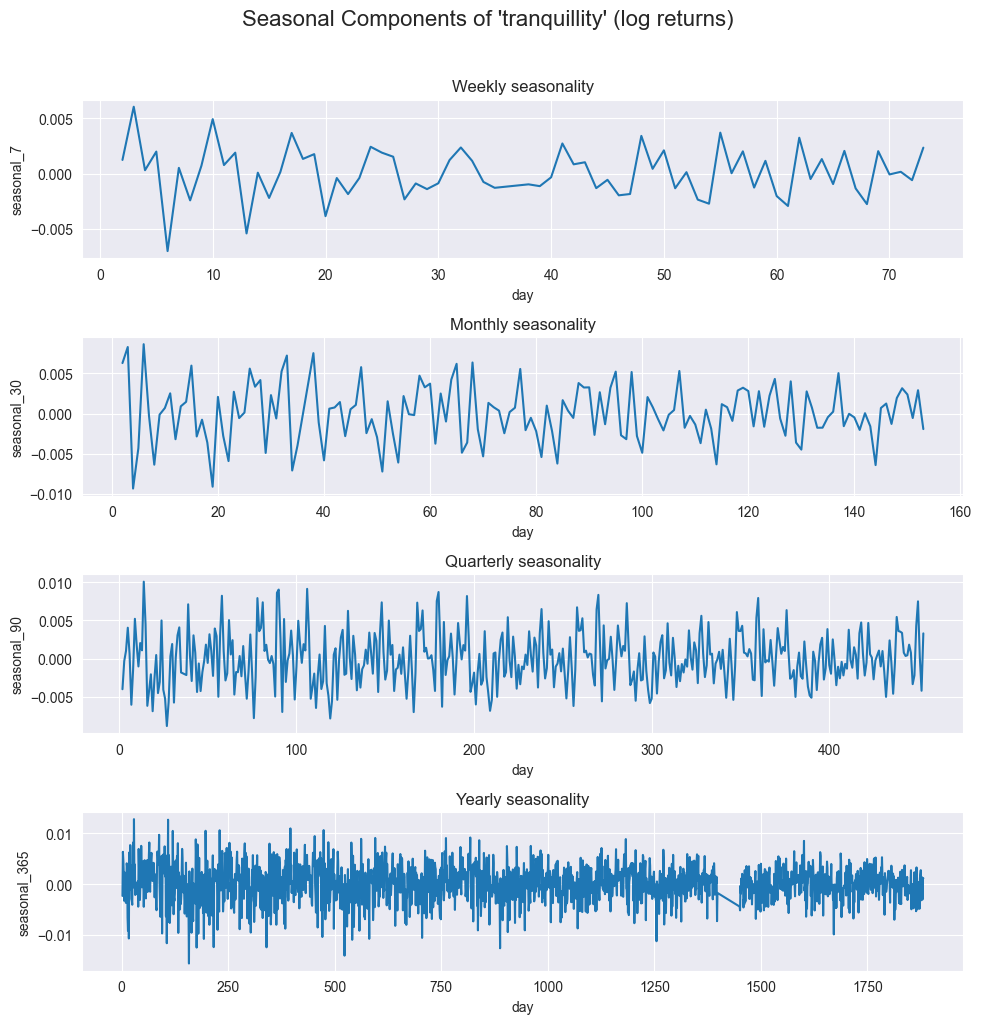

In [ ]:
periods = [7,30,90,365]  # Weekly, monthly, quaterly, yearly
sns.set_style("darkgrid")

# Loop over each series
for col in log_returns.columns:
    series = log_returns[col].dropna()
    if len(series) < max(periods) * 2:
        print(f"Skipping '{col}' — not enough data.")
        continue

    try:
        mstl = MSTL(series, periods=periods)
        result = mstl.fit()

        # Plotting
        fig = result.plot()
        fig.set_size_inches(10, 7)
        fig.suptitle(f"MSTL Decomposition of '{col}' (log returns)", fontsize=16, y=1.02)
        fig.fontsize = 6

        
        #plt.xlim(1,7*20)
        #plt.axis('equal')

        plt.tight_layout()
        plt.show()
        

        # Plotting seasonal components separately and zoomed in
        fig1, ax1 = plt.subplots(nrows=4, figsize=[10,10])
        fig1.suptitle(f"Seasonal Components of '{col}' (log returns)", fontsize=16, y=1.02)
        result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
        ax1[0].set_ylabel("seasonal_7")
        ax1[0].set_title("Weekly seasonality")

        result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
        ax1[1].set_ylabel("seasonal_30")
        ax1[1].set_title("Monthly seasonality")

        result.seasonal["seasonal_90"].iloc[:90*5].plot(ax=ax1[2])
        ax1[2].set_ylabel("seasonal_90")
        ax1[2].set_title("Quarterly seasonality")

        result.seasonal["seasonal_365"].iloc[:365*5].plot(ax=ax1[3])
        ax1[3].set_ylabel("seasonal_365")
        ax1[3].set_title("Yearly seasonality")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not decompose '{col}': {e}")




#### Jag tror jag hade sagt att monthly, quarterly, och yearly seasonality är relevanta för oss efter att kollat på STL decompen av priserna.

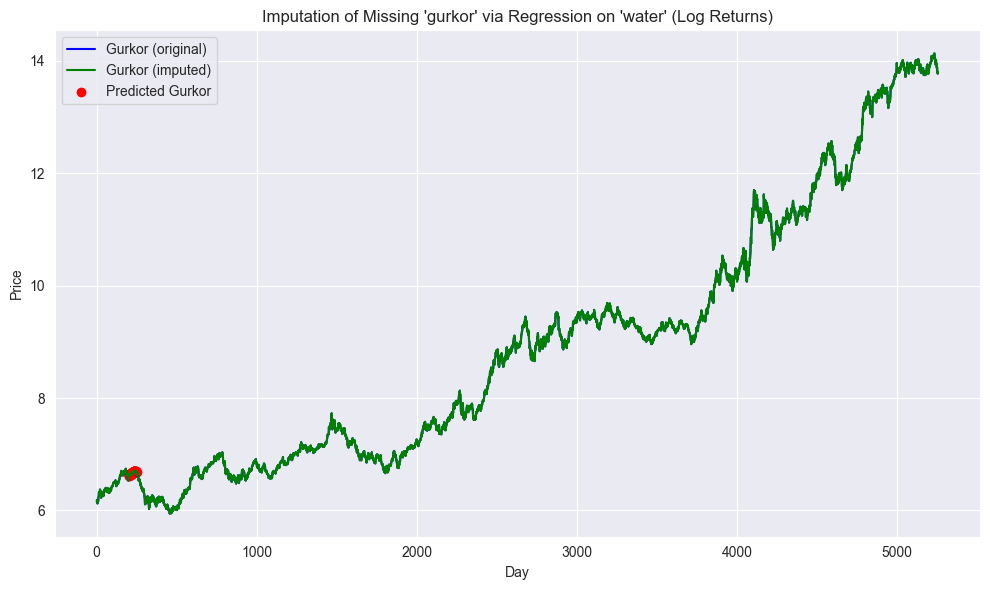

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model using non-missing pairs
df_non_missing = log_returns.dropna(subset=['gurkor', 'water'])
X_train = df_non_missing['water'].values.reshape(-1, 1)
Y_train = df_non_missing['gurkor'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Identify where 'gurkor' is missing but 'water' is available
missing_gurk_idx = log_returns[log_returns['gurkor'].isna()].index
valid_predict_rows = log_returns.loc[missing_gurk_idx].dropna(subset=['water'])

# Step 4: Predict missing log returns for 'gurkor'
X_pred = valid_predict_rows['water'].values.reshape(-1, 1)
predicted_returns = model.predict(X_pred)

# Step 5: Impute the predicted log returns
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'gurkor'] = predicted_returns.flatten()

# Step 6: Reconstruct the price series from log returns
# Start from first known value
df_imputed = data_filtered.copy()
start_price = df_imputed['gurkor'].dropna().iloc[0]
reconstructed = log_returns_imputed['gurkor'].copy()

# Fill the first known value
reconstructed.iloc[0] = np.log(start_price)

# Reconstruct log price -> price
reconstructed = reconstructed.cumsum().apply(np.exp)

# Replace only the imputed part into the original DataFrame
df_imputed['gurkor_imputed'] = df_imputed['gurkor']
df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'] = reconstructed.loc[valid_predict_rows.index]


# Plotting
plt.figure(figsize=(10, 6))
df_imputed["gurkor"].plot(label="Gurkor (original)", color='blue')
df_imputed["gurkor_imputed"].plot(label="Gurkor (imputed)", color='green')
plt.scatter(valid_predict_rows.index, df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'],
            color='red', label="Predicted Gurkor", zorder=1)
plt.title("Imputation of Missing 'gurkor' via Regression on 'water' (Log Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


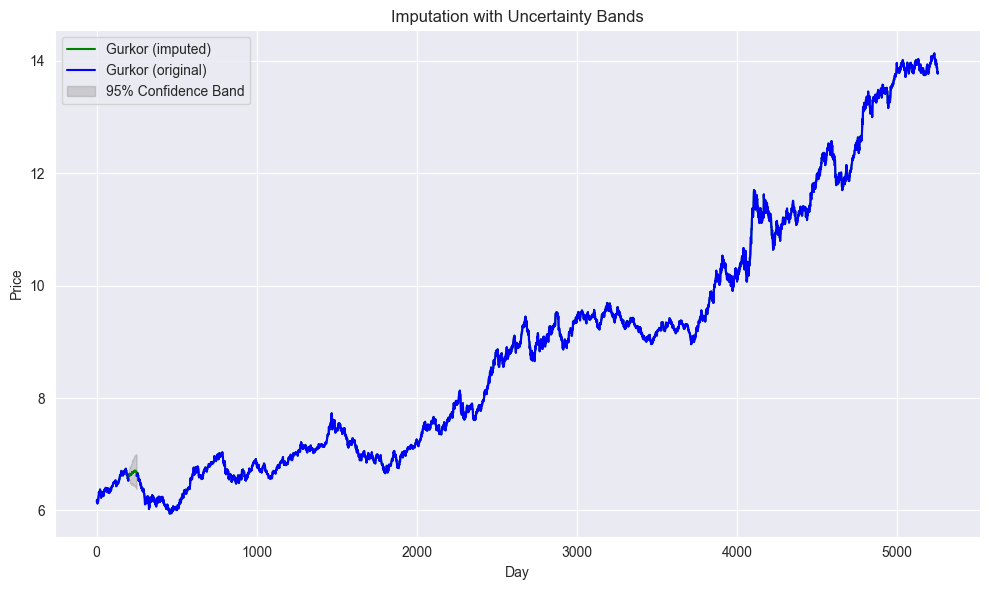

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model
df_non_missing = log_returns.dropna(subset=['gurkor', 'water'])
X_train = df_non_missing['water'].values.reshape(-1, 1)
Y_train = df_non_missing['gurkor'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Compute residuals and standard error
residuals = Y_train - model.predict(X_train)
mse = mean_squared_error(Y_train, model.predict(X_train))
X_mean = np.mean(X_train)
n = len(X_train)
SS_xx = np.sum((X_train - X_mean) ** 2)

# Step 4: Identify prediction points
missing_gurk_idx = log_returns[log_returns['gurkor'].isna()].index
valid_predict_rows = log_returns.loc[missing_gurk_idx].dropna(subset=['water'])
X_pred = valid_predict_rows['water'].values.reshape(-1, 1)

# Step 5: Compute predictions and standard errors
predicted_returns = model.predict(X_pred)
pred_se = np.sqrt(mse * (1 + 1/n + (X_pred - X_mean)**2 / SS_xx))  # Standard error

# Step 6: Impute with uncertainty bounds
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'gurkor'] = predicted_returns.flatten()

# Step 7: Reconstruct price series with uncertainty
start_price = data_filtered['gurkor'].dropna().iloc[0]
reconstructed = log_returns_imputed['gurkor'].copy()
reconstructed.iloc[0] = np.log(start_price)
reconstructed = reconstructed.cumsum().apply(np.exp)

# Add uncertainty to reconstructed prices
pred_se_cumulative = np.sqrt(np.cumsum(pred_se**2))  # Cumulative uncertainty
lower_bound = reconstructed.loc[valid_predict_rows.index] * np.exp(-1.96 * pred_se_cumulative)
upper_bound = reconstructed.loc[valid_predict_rows.index] * np.exp(1.96 * pred_se_cumulative)

# Step 8: Update DataFrame and plot
df_imputed = data_filtered.copy()
df_imputed['gurkor_imputed'] = df_imputed['gurkor']
df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'] = reconstructed.loc[valid_predict_rows.index]

plt.figure(figsize=(10, 6))
df_imputed["gurkor_imputed"].plot(label="Gurkor (imputed)", color='green')
df_imputed["gurkor"].plot(label="Gurkor (original)", color='blue')
plt.fill_between(valid_predict_rows.index, lower_bound, upper_bound, 
                 color='gray', alpha=0.3, label="95% Confidence Band")
#plt.scatter(valid_predict_rows.index, df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'],
 #           color='red', label="Predicted Gurkor", zorder=1)
plt.title("Imputation with Uncertainty Bands")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
#plt.xlim(180,260)
plt.show()

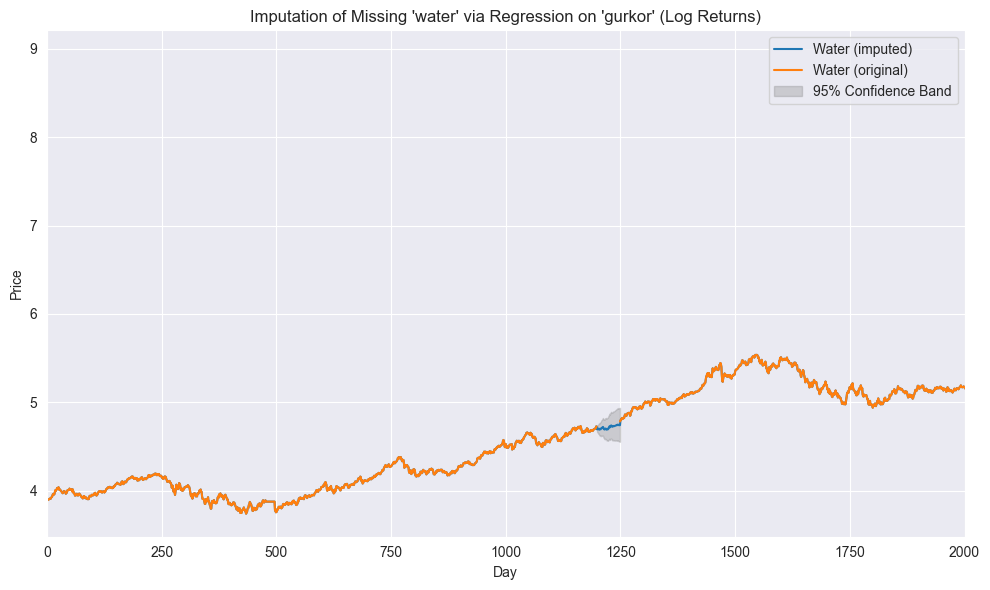

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model (now predicting 'water' from 'gurkor')
df_non_missing = log_returns.dropna(subset=['water', 'gurkor'])  # Swap columns
X_train = df_non_missing['gurkor'].values.reshape(-1, 1)        # Feature = 'gurkor'
Y_train = df_non_missing['water'].values.reshape(-1, 1)         # Target = 'water'

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Compute residuals and standard error
residuals = Y_train - model.predict(X_train)
mse = mean_squared_error(Y_train, model.predict(X_train))
X_mean = np.mean(X_train)
n = len(X_train)
SS_xx = np.sum((X_train - X_mean) ** 2)

# Step 4: Identify where 'water' is missing but 'gurkor' is available
missing_water_idx = log_returns[log_returns['water'].isna()].index
valid_predict_rows = log_returns.loc[missing_water_idx].dropna(subset=['gurkor'])

# Step 5: Predict missing log returns for 'water'
X_pred = valid_predict_rows['gurkor'].values.reshape(-1, 1)
predicted_returns = model.predict(X_pred)
pred_se = np.sqrt(mse * (1 + 1/n + (X_pred - X_mean)**2 / SS_xx))  # Standard error

# Step 6: Impute 'water' with uncertainty
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'water'] = predicted_returns.flatten()

# Step 7: Reconstruct price series with uncertainty
start_price_water = data_filtered['water'].dropna().iloc[0]  # Use first valid 'water' price
reconstructed_water = log_returns_imputed['water'].copy()
reconstructed_water.iloc[0] = np.log(start_price_water)
reconstructed_water = reconstructed_water.cumsum().apply(np.exp)

# Cumulative uncertainty for 'water'
pred_se_cumulative = np.sqrt(np.cumsum(pred_se**2))
lower_bound_water = reconstructed_water.loc[valid_predict_rows.index] * np.exp(-1.96 * pred_se_cumulative)
upper_bound_water = reconstructed_water.loc[valid_predict_rows.index] * np.exp(1.96 * pred_se_cumulative)

# Step 8: Update DataFrame and plot
df_imputed_water = data_filtered.copy()
df_imputed_water['water_imputed'] = df_imputed_water['water']
df_imputed_water.loc[valid_predict_rows.index, 'water_imputed'] = reconstructed_water.loc[valid_predict_rows.index]

plt.figure(figsize=(10, 6))
df_imputed_water["water_imputed"].plot(label="Water (imputed)")
df_imputed_water["water"].plot(label="Water (original)")
plt.fill_between(valid_predict_rows.index, lower_bound_water, upper_bound_water, 
                 color='gray', alpha=0.3, label="95% Confidence Band")
#plt.scatter(valid_predict_rows.index, df_imputed_water.loc[valid_predict_rows.index, 'water_imputed'],
#            color='red', label="Predicted Water", zorder=1)
plt.title("Imputation of Missing 'water' via Regression on 'gurkor' (Log Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
#plt.xlim(1175,1300)
#plt.xlim(0,2000)
plt.tight_layout()
plt.show()